<center><img SRC="CCSS.png" align="center" /></center>

<center> <h1 style="color: #5F9EA0">Análisis Estadistico</h1> </center>
<center> <h2 style="color: #696969">Lista de Espera Quirúrgica</h2></center>
<center> <h3 style="color: #696969">Gerencia General</h3></center>
<br>
<p style="text-align:justify"> El presenet cuaderno de trabajo, se crea con la finalidad de gestar un algoritmo que permita realizar de forma expedita un análisis estadístico descriptivo y diagnóstico sobre el comportamiento de la Lista de Espera Quirurgica.<br>
    
Este se irá desarrollando según la necesidad que se plantee en el momento, asimismo, si bien se generan gráficas es importante disponer de tablas para el tabulado correcto, de manera que se permita la creación de presentaciones con mejor visualización. </p>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

<h2 style="color: #2F4F4F">1. Carga del Archivo de datos</h2>

<p> La carga del archivo de datos se realiza desde el excel, en caso que la pc no tenga instalada la librería se puede instalar utilizando el comando:<br>
    
    conda install -c anaconda openpyxl</p>


In [2]:
dfLista = pd.read_excel("LE.xlsx",sheet_name='datos')

In [3]:
dfLista.head(5)


,I.D,U.P,CENTRO MEDICO,REGION,fechaRegistro,anio_de_registro,mesRegistro,diaRegistro,fechaCita,Servicio,...,puntajePriorizacion,esPriorizado,IdPriorizacionLE,SubEspecialidad,idSistema,Origen,TipoResolucion,sinonimoDiagnostico,sinonimoProcedimiento,estado_cita_actual
0,1.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,2022-06-20,Cirugía Ambulatoria,...,NaN,NO,NaN,NaN,871642,Consulta Externa,No ha sido resuelto,No se determinó el diagnóstico,Facoemulsificación y aspiración de catarata,NaN
1,2.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,2022-06-24,Cirugía Ambulatoria,...,NaN,NO,NaN,NaN,871641,Consulta Externa,No ha sido resuelto,No se determinó el diagnóstico,Facoemulsificación y aspiración de catarata,NaN
2,3.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,2022-06-20,Cirugía Ambulatoria,...,NaN,NO,NaN,NaN,871640,Consulta Externa,No ha sido resuelto,No se determinó el diagnóstico,Facoemulsificación y aspiración de catarata,NaN
3,4.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,2022-06-20,Cirugía Ambulatoria,...,NaN,NO,NaN,NaN,871639,Consulta Externa,No ha sido resuelto,No se determinó el diagnóstico,Facoemulsificación y aspiración de catarata,NaN
4,5.0,2502,H. ENRIQUE BALTODANO,CHOROTEGA,2022-05-02,2022,5,2,NaT,Cirugía Ambulatoria,...,NaN,NO,NaN,NaN,871638,Consulta Externa,No ha sido resuelto,No se determinó el diagnóstico,Otra extracción de catarata,NaN


In [4]:
dfLista.shape

(849976, 71)

<h2 style="color: #2F4F4F">2. Limpieza de Datos</h2>

<p>Una vez que se ha cargado el archivo de datos se inicia con el proceso de limpieza de datos, con el propósito de seleccionar las variables necesarias para el análisis, y para la generación de los datos necesarios para un forecasting</p>

In [5]:
dfLista.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849976 entries, 0 to 849975
Data columns (total 71 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   I.D                               848213 non-null  float64       
 1   U.P                               849976 non-null  int64         
 2   CENTRO MEDICO                     849976 non-null  object        
 3   REGION                            849976 non-null  object        
 4   fechaRegistro                     849976 non-null  datetime64[ns]
 5   anio_de_registro                  849976 non-null  int64         
 6   mesRegistro                       849976 non-null  int64         
 7   diaRegistro                       849976 non-null  int64         
 8   fechaCita                         519686 non-null  datetime64[ns]
 9   Servicio                          849976 non-null  object        
 10  Especialidad                    

In [6]:
dfLista.columns

Index(['I.D', 'U.P', 'CENTRO MEDICO', 'REGION ', 'fechaRegistro',
       'anio_de_registro', 'mesRegistro', 'diaRegistro', 'fechaCita',
       'Servicio', 'Especialidad', 'plazoEspera', 'modalidad_atencion',
       'estado_cita', 'UnidadProgramaTraslado',
       'NombreUnidadProgramaticaTraslado', 'EstadoTraslado',
       'fecha_de_atencion', 'ServicioEgreso', 'tipoIdentificacion',
       'numeroIdentificacion', 'nombrePaciente', 'primerApellido',
       'segundoApellido', 'telefono', 'telefono2', 'AnnoIngreso',
       'LETRA_DIAGNOSTICO', 'CodigoDiagnostico', 'descripcionDiagnostico',
       'codigoProcedimiento', 'Procedimiento', 'codigoMedico', 'nombreMedico',
       'fechaNacimiento', 'Observacion', 'codigoProvincia', 'Provincia',
       'codigoCanton', 'Canton', 'codigoDistrito', 'Distrito', 'Direccion',
       'Complejidad', 'fechaValoracion', 'GradoPriorizacion', 'fechaOperacion',
       'fechaAnterior', 'Lateralidad', 'fechaResolucion', 'EspecialidadEgreso',
       'MedicoCirug

<p>Con base en la identificación de las columnas necesarias para el proceso, se procede a generar un dataSet con las variables identificadas. Este será el que se utilice para genear los analalisis y los datos necesarios</p>

In [7]:
dfLQX = dfLista.loc[:,['I.D', 'U.P', 'CENTRO MEDICO', 'REGION ', 'fechaRegistro',
                'anio_de_registro', 'mesRegistro', 'diaRegistro', 'Servicio',
                'Especialidad', 'plazoEspera', 'modalidad_atencion', 'estado_cita','fecha_de_atencion',
               'CodigoDiagnostico','descripcionDiagnostico','fechaNacimiento','Provincia', 'Canton', 
               'Lateralidad', 'Sexo', 'Origen']]
dfLQX.head(3)

,I.D,U.P,CENTRO MEDICO,REGION,fechaRegistro,anio_de_registro,mesRegistro,diaRegistro,Servicio,Especialidad,...,estado_cita,fecha_de_atencion,CodigoDiagnostico,descripcionDiagnostico,fechaNacimiento,Provincia,Canton,Lateralidad,Sexo,Origen
0,1.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,Pendiente,NaT,H262,Catarata complicada,1944-04-14,Alajuela,Sarchí,Derecha,Masculino,Consulta Externa
1,2.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,Pendiente,NaT,H262,Catarata complicada,1945-07-26,Cartago,Cartago,Izquierda,Masculino,Consulta Externa
2,3.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,Pendiente,NaT,H262,Catarata complicada,1948-09-27,Alajuela,Alajuela,Izquierda,Masculino,Consulta Externa


In [8]:
dfLQX.columns

Index(['I.D', 'U.P', 'CENTRO MEDICO', 'REGION ', 'fechaRegistro',
       'anio_de_registro', 'mesRegistro', 'diaRegistro', 'Servicio',
       'Especialidad', 'plazoEspera', 'modalidad_atencion', 'estado_cita',
       'fecha_de_atencion', 'CodigoDiagnostico', 'descripcionDiagnostico',
       'fechaNacimiento', 'Provincia', 'Canton', 'Lateralidad', 'Sexo',
       'Origen'],
      dtype='object')

In [9]:
dfLQX = dfLQX.rename(columns={'I.D':'idUtle', 'U.P':'up', 'CENTRO MEDICO':'centroMedico', 'REGION ':'region',
                              'anio_de_registro':'anoRegistro', 'Servicio':'servicio','Especialidad':'especialidad',
                              'modalidad_atencion':'modalidad', 'estado_cita':'estadoCita','fecha_de_atencion':'fechaAtencion',
                              'CodigoDiagnostico':'codDiagnostico','descripcionDiagnostico':'dscDiagnostico','Provincia':'provincia',
                              'Canton':'canton','Lateralidad':'lateralidad', 'Sexo':'sexo', 'Origen':'origen'})

dfLQX.columns

Index(['idUtle', 'up', 'centroMedico', 'region', 'fechaRegistro',
       'anoRegistro', 'mesRegistro', 'diaRegistro', 'servicio', 'especialidad',
       'plazoEspera', 'modalidad', 'estadoCita', 'fechaAtencion',
       'codDiagnostico', 'dscDiagnostico', 'fechaNacimiento', 'provincia',
       'canton', 'lateralidad', 'sexo', 'origen'],
      dtype='object')

In [10]:
dfLQX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849976 entries, 0 to 849975
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idUtle           848213 non-null  float64       
 1   up               849976 non-null  int64         
 2   centroMedico     849976 non-null  object        
 3   region           849976 non-null  object        
 4   fechaRegistro    849976 non-null  datetime64[ns]
 5   anoRegistro      849976 non-null  int64         
 6   mesRegistro      849976 non-null  int64         
 7   diaRegistro      849976 non-null  int64         
 8   servicio         849976 non-null  object        
 9   especialidad     849976 non-null  object        
 10  plazoEspera      840803 non-null  float64       
 11  modalidad        849976 non-null  object        
 12  estadoCita       849976 non-null  object        
 13  fechaAtencion    660166 non-null  datetime64[ns]
 14  codDiagnostico   849

<h2 style="color: #2F4F4F">3. Calculo de Datos</h2>

<p>Con el set de datos filtrado, y seleccionadas las variables es importante generar los datos necesarios para el proceso de series temporales, a traves del cual se diseña el forecasting solicitado</p>
<br>
<p style="font-weight: bold;color: #00008B">Primero:<p/> 

<p>Obtener la cantidad de personas en estado Pendinte. Esto representa los usuarios en lista de espera a la fecha de corte. Para obtener esto, se realiza una agrupamiento de los datos, segun "Estado de la Cita", y a la vez se cuenta la cantidad de registros por estado. </p>


In [11]:
dfEstado = dfLQX.groupby(['estadoCita']).count()
dfEstado = dfEstado.iloc[:,:1]
dfEstado = dfEstado.rename(columns={'idUtle':'Cantidad'})
dfEstado

,Cantidad
estadoCita,
Depurado,192329
Derivado,11234
Pendiente,177561
Resuelto,467089


<p style="font-weight: bold;color: #00008B">Segundo:<p/> 

<p>Obtener la cantidad de ingreso de pacientes a la lista de espera, en el mes de corte, para esto es necesario realizar filtrar todos los registros correspondientes al mes de corte</p>

In [12]:
dfIngresosAno = dfLQX[dfLQX['anoRegistro'] == 2022]
dfIngresosMes = dfIngresosAno[dfIngresosAno['mesRegistro'] == 4]
dfIngresosMes["idUtle"].count()

10603

<p style="font-weight: bold;color: #00008B">Tercero:<p/> 

<p>Obtener la cantidad de resolución de pacientes en lista de espera, en el mes de corte, para esto es necesario obtener el dato de resoluciones del mes anterior (ingreso manual), para con el dato obtenido en el primer paso restar el dato de resoluciones del mes anterior.</p>

In [13]:
resoluciones = 467089 - 461134
resoluciones

5955

<p style="font-weight: bold;color: #00008B">Cuarto:<p/> 

<p>Obtener la cantidad de depuraciones de pacientes en lista de espera, en el mes de corte, para esto es necesario obtener el dato de depuraciones del mes anterior (ingreso manual), para con el dato obtenido en el primer paso restar el dato de depuraciones del mes anterior.</p>

In [14]:
depuraciones = 192329 - 190802
depuraciones

1527

<p style="font-weight: bold;color: #00008B">Quinto:<p/> 

<p>Obtener el plazo promedio de espera en la Lista de Espera Quirurgica. Para esto se filtran los datos de los pacientes con estado de cita igual a "Pendiente", con base en eso se calcula el promedio de la columna plazoEspera.</p>

In [15]:
dfPendientes = dfLQX[dfLQX['estadoCita'] == "Pendiente"]
avg_plazo = dfPendientes["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera: ", avg_plazo)

Promedio del Plazo de Espera:  539.0776789892373


<p style="font-weight: bold;color: #00008B">Sexto:<p/> 

<p>Estimación de la edad de las personas que conforman la lista de espera. Se realiza únicamente sobre los casos pendientes por tratarse de un Analisis Descriptivo</p>

In [16]:
lst_edad = []

for x in dfPendientes.itertuples():
    aNacimiento = x.fechaNacimiento.year
    edad = 2022 - aNacimiento
    lst_edad.append(edad)

print (len(lst_edad))

178004


In [17]:
dfPendientes.insert(22,"Edad",lst_edad,True)
dfPendientes.head(3)

,idUtle,up,centroMedico,region,fechaRegistro,anoRegistro,mesRegistro,diaRegistro,servicio,especialidad,...,fechaAtencion,codDiagnostico,dscDiagnostico,fechaNacimiento,provincia,canton,lateralidad,sexo,origen,Edad
0,1.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,NaT,H262,Catarata complicada,1944-04-14,Alajuela,Sarchí,Derecha,Masculino,Consulta Externa,78.0
1,2.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,NaT,H262,Catarata complicada,1945-07-26,Cartago,Cartago,Izquierda,Masculino,Consulta Externa,77.0
2,3.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,NaT,H262,Catarata complicada,1948-09-27,Alajuela,Alajuela,Izquierda,Masculino,Consulta Externa,74.0


In [18]:
dfPendientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178004 entries, 0 to 760360
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idUtle           177561 non-null  float64       
 1   up               178004 non-null  int64         
 2   centroMedico     178004 non-null  object        
 3   region           178004 non-null  object        
 4   fechaRegistro    178004 non-null  datetime64[ns]
 5   anoRegistro      178004 non-null  int64         
 6   mesRegistro      178004 non-null  int64         
 7   diaRegistro      178004 non-null  int64         
 8   servicio         178004 non-null  object        
 9   especialidad     178004 non-null  object        
 10  plazoEspera      177371 non-null  float64       
 11  modalidad        178004 non-null  object        
 12  estadoCita       178004 non-null  object        
 13  fechaAtencion    0 non-null       datetime64[ns]
 14  codDiagnostico   178

In [19]:
dfPendientes_isnull = dfPendientes.fillna(0)
dfPendientes_isnull.head()

,idUtle,up,centroMedico,region,fechaRegistro,anoRegistro,mesRegistro,diaRegistro,servicio,especialidad,...,fechaAtencion,codDiagnostico,dscDiagnostico,fechaNacimiento,provincia,canton,lateralidad,sexo,origen,Edad
0,1.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,0,H262,Catarata complicada,1944-04-14 00:00:00,Alajuela,Sarchí,Derecha,Masculino,Consulta Externa,78.0
1,2.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,0,H262,Catarata complicada,1945-07-26 00:00:00,Cartago,Cartago,Izquierda,Masculino,Consulta Externa,77.0
2,3.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,0,H262,Catarata complicada,1948-09-27 00:00:00,Alajuela,Alajuela,Izquierda,Masculino,Consulta Externa,74.0
3,4.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,0,H262,Catarata complicada,1947-04-21 00:00:00,Alajuela,Alajuela,Derecha,Femenino,Consulta Externa,75.0
4,5.0,2502,H. ENRIQUE BALTODANO,CHOROTEGA,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,0,H251,Catarata senil nuclear,1951-10-20 00:00:00,Guanacaste,Cañas,Izquierda,Masculino,Consulta Externa,71.0


<h2 style="color: #008B8B">Manejo de Valores Faltantes</h2>

<p></p>

In [20]:
valoresPerdidos = dfPendientes.isnull()

In [21]:
valoresPerdidos.head(5)

,idUtle,up,centroMedico,region,fechaRegistro,anoRegistro,mesRegistro,diaRegistro,servicio,especialidad,...,fechaAtencion,codDiagnostico,dscDiagnostico,fechaNacimiento,provincia,canton,lateralidad,sexo,origen,Edad
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [22]:
for column in valoresPerdidos.columns.values.tolist():
    print (column)
    print (valoresPerdidos[column].value_counts())
    print ("")

idUtle
False    177561
True        443
Name: idUtle, dtype: int64

up
False    178004
Name: up, dtype: int64

centroMedico
False    178004
Name: centroMedico, dtype: int64

region
False    178004
Name: region, dtype: int64

fechaRegistro
False    178004
Name: fechaRegistro, dtype: int64

anoRegistro
False    178004
Name: anoRegistro, dtype: int64

mesRegistro
False    178004
Name: mesRegistro, dtype: int64

diaRegistro
False    178004
Name: diaRegistro, dtype: int64

servicio
False    178004
Name: servicio, dtype: int64

especialidad
False    178004
Name: especialidad, dtype: int64

plazoEspera
False    177371
True        633
Name: plazoEspera, dtype: int64

modalidad
False    178004
Name: modalidad, dtype: int64

estadoCita
False    178004
Name: estadoCita, dtype: int64

fechaAtencion
True    178004
Name: fechaAtencion, dtype: int64

codDiagnostico
False    178004
Name: codDiagnostico, dtype: int64

dscDiagnostico
False    178004
Name: dscDiagnostico, dtype: int64

fechaNacimiento
Fal

In [23]:
dfPendientes.dropna()
dfPendientes.reset_index(drop=True, inplace=True)

In [24]:
dfPendientes["Edad"].replace(np.nan, 0, inplace=True)

C:\Users\jgzuniga\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [25]:
valoresPerdidos = dfPendientes.isnull()

In [26]:
for column in valoresPerdidos.columns.values.tolist():
    print (column)
    print (valoresPerdidos[column].value_counts())
    print ("")

idUtle
False    177561
True        443
Name: idUtle, dtype: int64

up
False    178004
Name: up, dtype: int64

centroMedico
False    178004
Name: centroMedico, dtype: int64

region
False    178004
Name: region, dtype: int64

fechaRegistro
False    178004
Name: fechaRegistro, dtype: int64

anoRegistro
False    178004
Name: anoRegistro, dtype: int64

mesRegistro
False    178004
Name: mesRegistro, dtype: int64

diaRegistro
False    178004
Name: diaRegistro, dtype: int64

servicio
False    178004
Name: servicio, dtype: int64

especialidad
False    178004
Name: especialidad, dtype: int64

plazoEspera
False    177371
True        633
Name: plazoEspera, dtype: int64

modalidad
False    178004
Name: modalidad, dtype: int64

estadoCita
False    178004
Name: estadoCita, dtype: int64

fechaAtencion
True    178004
Name: fechaAtencion, dtype: int64

codDiagnostico
False    178004
Name: codDiagnostico, dtype: int64

dscDiagnostico
False    178004
Name: dscDiagnostico, dtype: int64

fechaNacimiento
Fal

In [27]:
dfPendientes["plazoEspera"].replace(np.nan, 0, inplace=True)

<h2 style="color: #008B8B">4. Graficos</h2>

<p>Se inicia con la generación de graficos de datos macro de la lista de espera, esto permitirá conocer el set de datos</p>
<br>

<h3 style="color: #8FBC8F">4.1 Distribución de personas según edad</h3>

<p>En primera instancia se procura conocer la distribución de la lista de espera quirurgica según edad del paciente, de manera que se identifique la población que más está requeriendo antención quirurgica a nivel nacional.</p>


In [28]:
gf1 = dfPendientes.groupby(['Edad']).count()
gf1 = gf1.iloc[:,:1]
gf1

,idUtle
Edad,
0.0,39
1.0,300
2.0,533
3.0,714
4.0,812
...,...
101.0,3
102.0,1
103.0,3


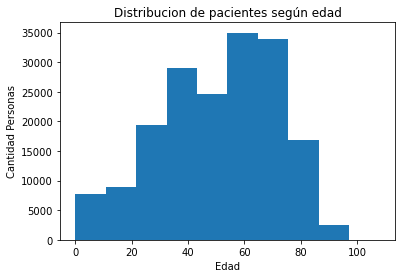

In [29]:
plt.hist(dfPendientes["Edad"])
plt.xlabel("Edad")
plt.ylabel("Cantidad Personas")
plt.title("Distribucion de pacientes según edad")
plt.show()

<p> En terminos generales, la mayor parte de la Lista de Espera esta conformada por personas que tienen entre 30 y 80 años, estando la mayor cantidad consentrada en pacientes adultos mayores</p>
<br>
<p>Como se puede observar la distribución de personas, en función de la edad, permite identificar que actualmente 35 mil pacientes tienen 60 años, siendo esta la mayor población de la lista de espera, seguido de las personas de 70 años, 40 años, 50 años, entre otros.</p>

<h3 style="color: #8FBC8F">4.2 Cantidad de casos según plazo de espera</h3>

<p>Una vez que conocemos la distribución de la lista de espera quirurgica, según grupos de edad, es necesario conocer la cantidad de casos seegún el plazo de espera de menra que se pueda identificar la cantidad de personas y de dias que han aguardado por una cirugía</p>

In [30]:
dfPendientes[["plazoEspera"]] = dfPendientes[["plazoEspera"]].astype("int")

C:\Users\jgzuniga\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
nombres = ['90Dias', '180Dias', '270Dias', '1Año', '2Años', '3Años', '4Años', '5Años','6Años','7Años','8Años']


bins =  [0, 90, 180, 270, 360, 730, 1095, 1460, 1825, 2190, 2555, 2920]
dfPendientes['bin_PlazoEspera'] = pd.cut(dfPendientes['plazoEspera'] , bins=bins,labels=nombres, include_lowest=True) 
dfPendientes.head(5)

C:\Users\jgzuniga\AppData\Local\Temp/ipykernel_22680/3640475649.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPendientes['bin_PlazoEspera'] = pd.cut(dfPendientes['plazoEspera'] , bins=bins,labels=nombres, include_lowest=True)


,idUtle,up,centroMedico,region,fechaRegistro,anoRegistro,mesRegistro,diaRegistro,servicio,especialidad,...,codDiagnostico,dscDiagnostico,fechaNacimiento,provincia,canton,lateralidad,sexo,origen,Edad,bin_PlazoEspera
0,1.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,H262,Catarata complicada,1944-04-14,Alajuela,Sarchí,Derecha,Masculino,Consulta Externa,78.0,90Dias
1,2.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,H262,Catarata complicada,1945-07-26,Cartago,Cartago,Izquierda,Masculino,Consulta Externa,77.0,90Dias
2,3.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,H262,Catarata complicada,1948-09-27,Alajuela,Alajuela,Izquierda,Masculino,Consulta Externa,74.0,90Dias
3,4.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,H262,Catarata complicada,1947-04-21,Alajuela,Alajuela,Derecha,Femenino,Consulta Externa,75.0,90Dias
4,5.0,2502,H. ENRIQUE BALTODANO,CHOROTEGA,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,H251,Catarata senil nuclear,1951-10-20,Guanacaste,Cañas,Izquierda,Masculino,Consulta Externa,71.0,90Dias


In [32]:
gf2 = dfPendientes.groupby(['bin_PlazoEspera']).count()
gf2 = gf2.iloc[:,:1]
gf2

,idUtle
bin_PlazoEspera,
90Dias,30387
180Dias,21929
270Dias,18064
1Año,13102
2Años,31999
3Años,39922
4Años,15635
5Años,5053
6Años,1210


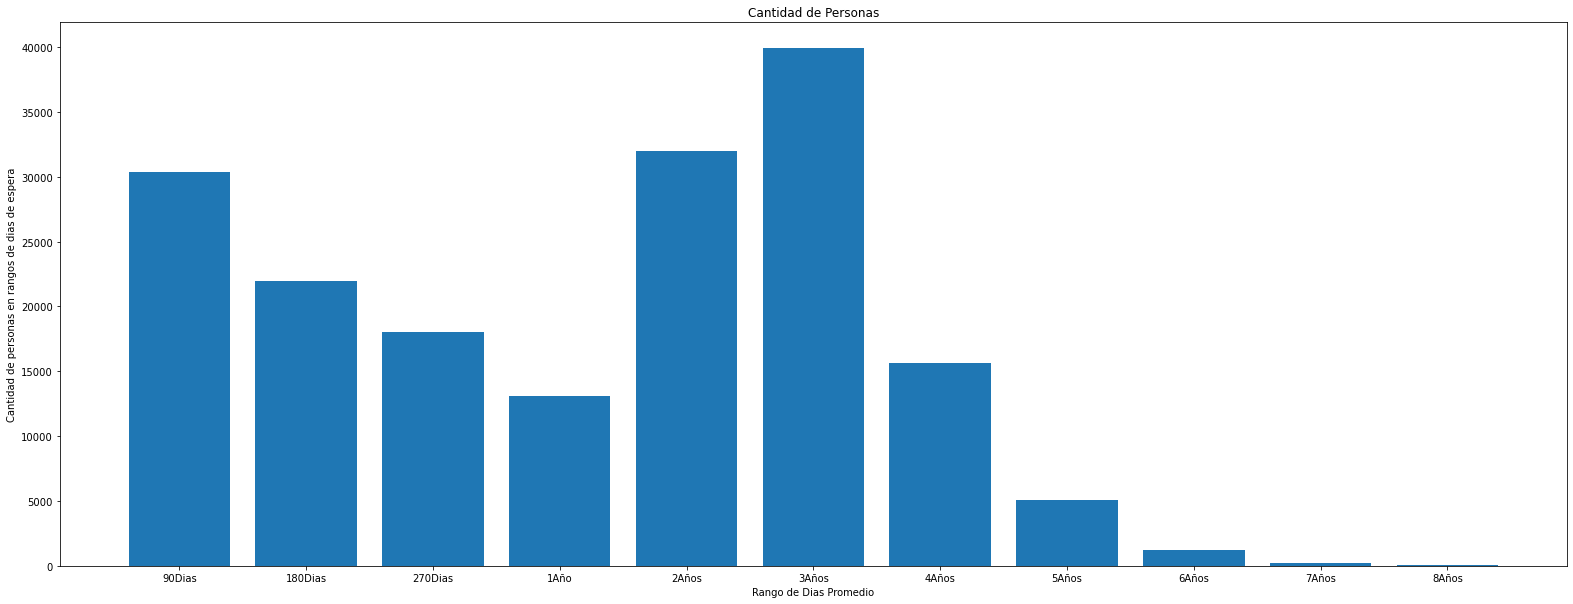

In [33]:
eje_x = gf2.index.tolist()
eje_y = gf2['idUtle'].tolist()

plt.figure(figsize=(27,10))
##Creamos la Grafica
plt.bar(eje_x, eje_y)

##Leyenda en el eje y
plt.ylabel('Cantidad de personas en rangos de dias de espera')

##Leyenda en el eje x
plt.xlabel("Rango de Dias Promedio")

##Titulo del Grafico
plt.title("Cantidad de Personas")

plt.show()

<p>Como se puede apreciar existen casos que aguardan hasta 8 años por una cirugia, asimismo, la mayor cantidad de personas aguardan entre 2 y 3 años por una operación en la Caja Costarricense de Seguro Social.

Aactualmente existen 80 personas que han esperado más de 7 años por una intervención quirurgica, 31 mil esperan 2 años y 39 mil 3 años</p>


<h3 style="color: #8FBC8F">4.3 Cantidad de casos según modalidad de atención</h3>

<p>Otro elemento importante es conocer la cantidad de pacientes que conforman la lista de espera, según modalidad de atención, de manera que se pueda conocer cuantas cirugías son ambulatorias y cuantas requieren de un periodo de hospitalización. Esto permitirá denotar la posibilidad de direccionar recursos a diferentes estratégias institucionales como alta programada, programa de cirugía ambulatoria, entre otros.</p>

In [34]:
dfPendientes.head(5)

,idUtle,up,centroMedico,region,fechaRegistro,anoRegistro,mesRegistro,diaRegistro,servicio,especialidad,...,codDiagnostico,dscDiagnostico,fechaNacimiento,provincia,canton,lateralidad,sexo,origen,Edad,bin_PlazoEspera
0,1.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,H262,Catarata complicada,1944-04-14,Alajuela,Sarchí,Derecha,Masculino,Consulta Externa,78.0,90Dias
1,2.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,H262,Catarata complicada,1945-07-26,Cartago,Cartago,Izquierda,Masculino,Consulta Externa,77.0,90Dias
2,3.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,H262,Catarata complicada,1948-09-27,Alajuela,Alajuela,Izquierda,Masculino,Consulta Externa,74.0,90Dias
3,4.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,H262,Catarata complicada,1947-04-21,Alajuela,Alajuela,Derecha,Femenino,Consulta Externa,75.0,90Dias
4,5.0,2502,H. ENRIQUE BALTODANO,CHOROTEGA,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,H251,Catarata senil nuclear,1951-10-20,Guanacaste,Cañas,Izquierda,Masculino,Consulta Externa,71.0,90Dias


In [35]:
gf3 = dfPendientes.groupby(['modalidad']).count()
gf3 = gf3.iloc[:,:1]
gf3

,idUtle
modalidad,
Ambulatorio,131977
Cirugía de corta estancia,353
Hospitalizado,45231


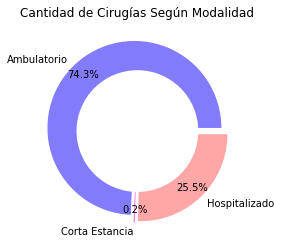

In [36]:
# Nombre de las etiquetas del grafico.
modalidad = ['Ambulatorio', 'Corta Estancia', 'Hospitalizado']
  
#Datos del Grafico.
datos = gf3['idUtle'].tolist()
  
# colors
colors = ['#827cfd', '#ff5deb', 
          '#ffa6a7']
# explosion
explode = (0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(datos, colors=colors, labels=modalidad,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Cantidad de Cirugías Según Modalidad')
  
# Displaing Chart
plt.show()

<h3 style="color: #8FBC8F">4.4 Cantidad de casos según sexo</h3>

<p>Este es un dato estadístico que permitirá conocer cuantos hombres y mujeres conforman la lista de espera quirurgica, enventualmetne este dato prodría ser util para elementos epidemiológicos.</p>

In [37]:
gf4 = dfPendientes.groupby(['sexo']).count()
gf4 = gf4.iloc[:,:1]
gf4

,idUtle
sexo,
Femenino,99219
Indefinido,1
Masculino,78341


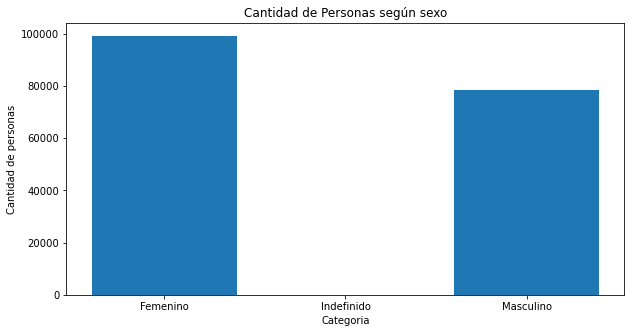

In [38]:
eje_x = gf4.index.tolist()
eje_y = gf4['idUtle'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
plt.bar(eje_x, eje_y)

##Leyenda en el eje y
plt.ylabel('Cantidad de personas')

##Leyenda en el eje x
plt.xlabel("Categoria")

##Titulo del Grafico
plt.title("Cantidad de Personas según sexo")

plt.show()

<h3 style="color: #8FBC8F">4.5 Cantidad de casos según especialidad</h3>

<p>El obtener la cantidad de casos según especialidad en la lista de espera, permitirá identificar las especialidades que mayor demanda tienen, lo cual tendrá una relación con el plazo de espera, en razón del volumen de personas que conforman la lista de esa especialidad</p>

In [39]:
gf5 = dfPendientes.groupby(['especialidad']).count()
gf5 = gf5.iloc[:,:1]
tempGF5 = gf5.sort_values('idUtle',ascending=True)
tempGF5

,idUtle
especialidad,
Medicina Interna,1
Unidad de quemados,1
Medicina General,1
Endocrinología,1
Gastroenterología,1
Neumología,2
Unidad Urgencias Quirúrgicas,3
Odontología General,6
Oncología Médica,8


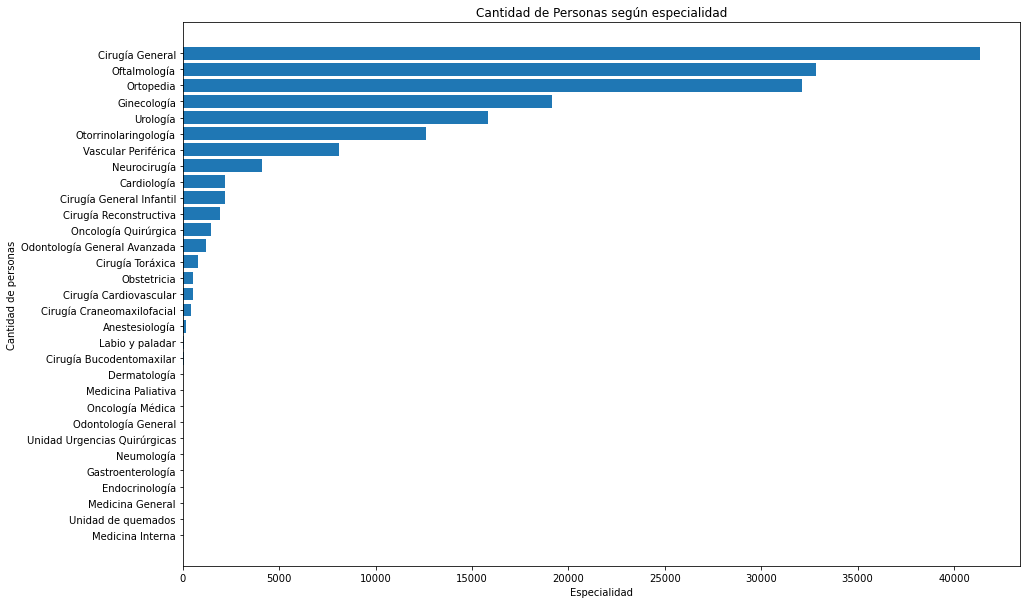

In [40]:
eje_x = tempGF5.index.tolist()
eje_y = tempGF5['idUtle'].tolist()


plt.figure(figsize=(15,10))
##Creamos la Grafica
plt.barh(eje_x, eje_y)
         

##Leyenda en el eje y
plt.ylabel('Cantidad de personas')

##Leyenda en el eje x
plt.xlabel("Especialidad")

##Titulo del Grafico
plt.title("Cantidad de Personas según especialidad")

plt.show()

<h3 style="color: #8FBC8F">4.6 Cantidad de casos según región</h3>

<p>Otro elemento para considerar es la cantidad de casos según región, de manera que se determina donde esta la mayor concentración de personas en la lista de espera quierugica.</p>

In [41]:
gf6 = dfPendientes.groupby(['region']).count()
gf6 = gf6.iloc[:,:1]
gf6

,idUtle
region,
BRUNCA,16616
CENTRAL NORTE,35854
CENTRAL SUR,19421
CHOROTEGA,17460
GAM,65323
HUETAR ALTLANTICA,8304
HUETAR NORTE,6116
PACIFICO CENTRAL,8467


<Figure size 720x1440 with 0 Axes>

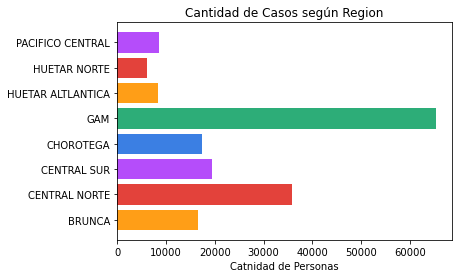

In [42]:
eje_x = gf6.index.tolist()
eje_y = gf6['idUtle'].tolist()

plt.figure(figsize=(10,20))
fig, ax = plt.subplots()


bar_colors = ['#FF9E17', '#E3423B', '#B54DFA', '#3B7FE3', '#2DAD78']

ax.barh(eje_x, eje_y,  color=bar_colors)

ax.set_title('Cantidad de Casos según Region')
ax.set_xlabel('Catnidad de Personas')

plt.show()

<h3 style="color: #8FBC8F">4.7 Cantidad de casos según diagnóstico</h3>

<p>Se han identificado 2180 diagnósticos registrados en la lista de espera, sin embargo, ante el volumen se debe considerar los 10 primeros diagnósticos de la Lista de Espera, siendo que ante su complejidad, volumen y ubicación podrían gestionarse estratégias especificas a nivel nacional y según región</p>

In [43]:
gf7 = dfPendientes.groupby(['dscDiagnostico']).count()
gf7 = gf7.iloc[:,:1]
tempGF7 = gf7.sort_values('idUtle',ascending=False)
tempGF7

,idUtle
dscDiagnostico,
Esterilización,13522
Calculo de la vesicula biliar sin colecistitis,10827
"Catarata, no especificada",8383
Pterigion,7556
Catarata senil nuclear,7387
...,...
Encefalitis aguda diseminada,1
Callos y callosidades,0
"Tumor benigno de la piel del miembro inferior, incluida la cadera",0


In [44]:
top10Dx = tempGF7.head(10)
top10Dx

,idUtle
dscDiagnostico,
Esterilización,13522
Calculo de la vesicula biliar sin colecistitis,10827
"Catarata, no especificada",8383
Pterigion,7556
Catarata senil nuclear,7387
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",6875
Hernia umbilical sin obstruccion ni gangrena,4391
Hiperplasia de la prostata,4342
"Gonartrosis, no especificada",3961


<Figure size 720x1440 with 0 Axes>

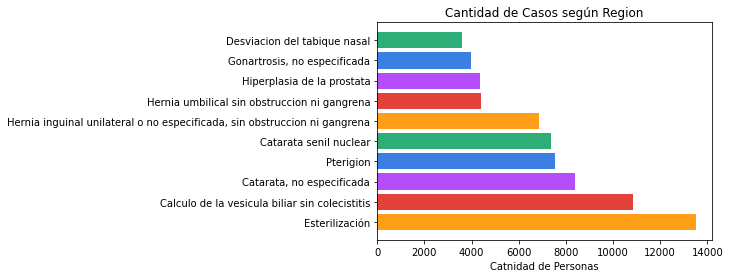

In [45]:
eje_x = top10Dx.index.tolist()
eje_y = top10Dx['idUtle'].tolist()

plt.figure(figsize=(10,20))
fig, ax = plt.subplots()


bar_colors = ['#FF9E17', '#E3423B', '#B54DFA', '#3B7FE3', '#2DAD78']

ax.barh(eje_x, eje_y,  color=bar_colors)

ax.set_title('Cantidad de Casos según Region')
ax.set_xlabel('Catnidad de Personas')

plt.show()


<p>Considerando que el diagnóstico de esterilización es el de mayor relevancia en la lista de espera quirurgica, se procederá a identificar cuantos de esos corresponden a hombres y mujeres, asimismo, cual es plazo promedio de espera para dicha operación y cuales hospitales concentran la mayor poblacion con ese diagnótico</p>

<h3 style="color: #5c272e">4.7.1 Filtrado por diagnóstico de Esterlización</h3>

In [46]:
in_esterilizacion = dfPendientes['dscDiagnostico'] == 'Esterilización'
in_esterilizacion1 = dfPendientes[in_esterilizacion]
in_esterilizacion1.shape

(13522, 24)

In [47]:
gf7a = in_esterilizacion1.groupby(['sexo']).count()
gf7a = gf7a.iloc[:,:1]
gf7a

,idUtle
sexo,
Femenino,10320
Masculino,3202


<h4 style="color: #a75846">4.7.2 Cantidad de Personas según diagnóstico y sexo</h4>


<p>Con el propósito de conocer la cantidad de personas que aguardan por una ciguría de esterilización, se procede a agrupar los datos según sexo, permitiendo identificar que 10 mil pesonas son mujeres y 3 mil son hombres.</p>

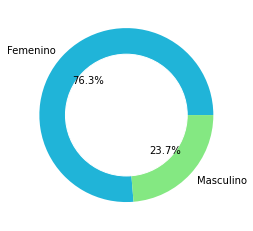

In [48]:
# list of name of students
names = ['Femenino', 'Masculino']
  
# list of their respective marks
marks = gf7a['idUtle'].tolist()
  
# Create a circle at the center of
# the plot
my_circle = plt.Circle((0, 0), 0.7, color='white')
  
# Give color names
plt.pie(marks, labels=names, autopct='%1.1f%%',
        colors=['#20b4d8', '#84e882'])
  
p = plt.gcf()
p.gca().add_artist(my_circle)
  
# Show the graph
plt.show()

<h4 style="color: #a75846">4.7.3 Cantidad de Personas según diagnóstico y Centro Médico</h4>


<p>Se han agrupado los datos por establecimiento de salud, con el propósito de conocer la distribución de las personas por unidad programatica, esto podría permitir definir estratégias de atención.</p>

In [49]:
gf7b = in_esterilizacion1.groupby(['centroMedico']).count()
gf7b = gf7b.iloc[:,:1]
tempGF7b = gf7b.sort_values('idUtle',ascending=False)
tempGF7b

,idUtle
centroMedico,
H. SAN JUAN DE DIOS,2953
CAIS CAÑAS,1522
H. MAX PERALTA,1291
H. SAN VICENTE PAUL,1186
CARIT,1078
H. LA ANEXION,777
H. ESCALANTE PRADILLA,676
H. MONSEÑOR SANABRIA,673
H. MEXICO,473


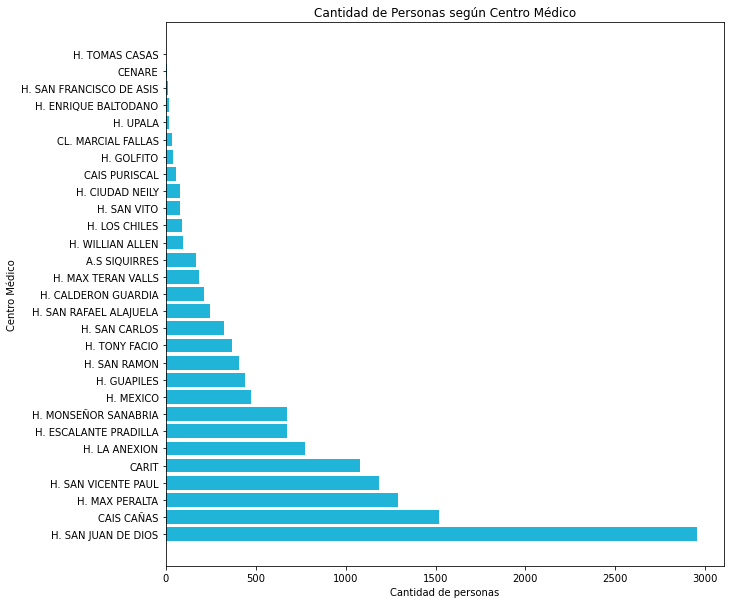

In [50]:
eje_x = tempGF7b.index.tolist()
eje_y = tempGF7b['idUtle'].tolist()

plt.figure(figsize=(10,10))
##Creamos la Grafica
bar_colors = ['#20b4d8']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h3 style="color: #8FBC8F">4.8 Cantidad de casos según diagnóstico</h3>

<p>Se han identificado 2180 diagnósticos registrados en la lista de espera, sin embargo, ante el volumen se debe considerar los 10 últimos diagnósticos de la Lista de Espera, siendo que ante su complejidad, volumen y ubicación podrían gestionarse estratégias especificas a nivel nacional y según región.</p>

In [51]:
gf8 = dfPendientes.groupby(['dscDiagnostico']).count()
gf8 = gf8.iloc[:,:1]
tempGF8 = gf8.sort_values('idUtle',ascending=True)
tail10Dx = tempGF8.head(15)
tail10Dx

,idUtle
dscDiagnostico,
Dispareunia no organica,0
Callos y callosidades,0
"Tumor benigno de la piel del miembro inferior, incluida la cadera",0
Erosión y ectropión del cuello del útero,0
Melanoma maligno de sitios contiguos de la piel,1
"Meningoencefalitis y meningomielitis bacterianas, no clasificadas en otra parte",1
Miasis nasofaringea,1
Microcefalia,1
Mielopatia en enfermedades clasificadas en otra parte,1


<h3 style="color: #ff4e51">4.2 Analisis Regional de la Lista de Espera</h3>

<p>Considerando el análisis realizado sobre las generalidades se procede a efectuar un analisis macro de las regiones, considerando las mismas variables antes observadas, solo que con un enfoque regional, esto para conocer el estado de cada una de las unidades.</p>
</br>
<img src="DRIPS.png">

In [52]:
dfPendientes.head(3)

,idUtle,up,centroMedico,region,fechaRegistro,anoRegistro,mesRegistro,diaRegistro,servicio,especialidad,...,codDiagnostico,dscDiagnostico,fechaNacimiento,provincia,canton,lateralidad,sexo,origen,Edad,bin_PlazoEspera
0,1.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,H262,Catarata complicada,1944-04-14,Alajuela,Sarchí,Derecha,Masculino,Consulta Externa,78.0,90Dias
1,2.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,H262,Catarata complicada,1945-07-26,Cartago,Cartago,Izquierda,Masculino,Consulta Externa,77.0,90Dias
2,3.0,2802,OFTALMOLOGICA,GAM,2022-05-02,2022,5,2,Cirugía Ambulatoria,Oftalmología,...,H262,Catarata complicada,1948-09-27,Alajuela,Alajuela,Izquierda,Masculino,Consulta Externa,74.0,90Dias


<h4 style="color:#b14f7f">4.2.1 Lista de Espera de la Region "GAM"</h4>

<p>Se realiza la agrupación de datos considerando únicamente los establecimientos médicos del Gran Área Metropolitana, de manera que se pueda comprender donde está la mayor concentración de casos para los establecimientos</p>

In [53]:
in_region1 = dfPendientes['region'] == 'GAM'
in_region1 = dfPendientes[in_region1]
in_region1.shape

(65323, 24)

In [54]:
gf9 = in_region1.groupby(['dscDiagnostico']).count()
gf9 = gf9.iloc[:,:1]
tempGF9 = gf9.sort_values('idUtle',ascending=False)
top10Dx = tempGF9.head(10)
top10Dx

,idUtle
dscDiagnostico,
Esterilización,4723
Calculo de la vesicula biliar sin colecistitis,3414
"Gonartrosis, no especificada",2439
"Catarata, no especificada",2155
Obesidad debida a exceso de calorias,2016
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",1746
Hiperplasia de la prostata,1275
Venas varicosas de los miembros inferiores sin ·lcera ni inflamacion,1248
Catarata senil nuclear,1195


<h4 style="color: #b14f7f">4.2.2 Concentración de la Lista de Espera según Hospital</h4>

<p>Se obtiene la distribución de la lista de espera por hospital, con el propósito de conocer en cual establecimiento se concentra la mayor cantidad de listas de espera quirurgica</p>

In [55]:
gf8 = in_region1.groupby(['centroMedico']).count()
gf8 = gf8.iloc[:,:1]
tempGF8 = gf8.sort_values('idUtle',ascending=False)
tempGF8

,idUtle
centroMedico,
H. CALDERON GUARDIA,21518
H. SAN JUAN DE DIOS,19819
H. MEXICO,11098
H. NIÑOS,5817
CENARE,2545
CARIT,2402
OFTALMOLOGICA,1156
BLANCO CERVANTES,968


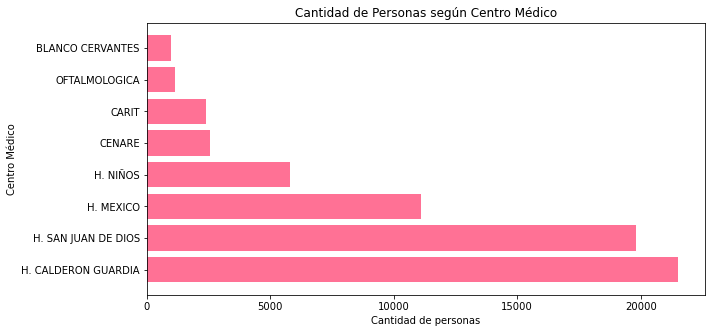

In [56]:
eje_x = tempGF8.index.tolist()
eje_y = tempGF8['idUtle'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#ff7195']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color: #b14f7f">4.2.3 Plazo Promedio de Espera según Hospital</h4>

<p>Se generan los plazos promedio de espera, según hospital con el propósito de conocer por plazos promedios de espera donde podríamos orientar los recursos de la región para impactar en los plazos de espera globales</p>

In [57]:
dfPlazosGAM = pd.DataFrame()
dfPlazosGAM['Unidad'] = None
dfPlazosGAM['PlazoPromedio'] = None
print(dfPlazosGAM)

Empty DataFrame
Columns: [Unidad, PlazoPromedio]
Index: []


In [58]:
in_2101 = in_region1['up'] == 2101
in_2101 = in_region1[in_2101]
avg_plazo_2101 = in_2101["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera 2101: ", avg_plazo_2101)

Promedio del Plazo de Espera 2101:  573.375360163584


In [59]:
in_2102 = in_region1['up'] == 2102
in_2102 = in_region1[in_2102]
avg_plazo_2102 = in_2102["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera 2102: ", avg_plazo_2102)

Promedio del Plazo de Espera 2102:  547.1481406730915


In [60]:
in_2104 = in_region1['up'] == 2104
in_2104 = in_region1[in_2104]
avg_plazo_2104 = in_2104["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera 2104: ", avg_plazo_2104)

Promedio del Plazo de Espera 2104:  533.6062353577221


In [61]:
in_2103 = in_region1['up'] == 2103
in_2103 = in_region1[in_2103]
avg_plazo_2103 = in_2103["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera 2103: ", avg_plazo_2103)

Promedio del Plazo de Espera 2103:  514.4926938284339


In [62]:
in_2203 = in_region1['up'] == 2203
in_2203 = in_region1[in_2203]
avg_plazo_2203 = in_2203["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera 2203: ", avg_plazo_2203)

Promedio del Plazo de Espera 2203:  979.5854616895874


In [63]:
in_2105 = in_region1['up'] == 2105
in_2105 = in_region1[in_2105]
avg_plazo_2105 = in_2105["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera 2105: ", avg_plazo_2105)

Promedio del Plazo de Espera 2105:  342.0512073272273


In [64]:
in_2802 = in_region1['up'] == 2802
in_2802 = in_region1[in_2802]
avg_plazo_2802 = in_2802["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera 2802: ", avg_plazo_2802)

Promedio del Plazo de Espera 2802:  137.32698961937717


In [65]:
in_2202 = in_region1['up'] == 2202
in_2202 = in_region1[in_2202]
avg_plazo_2202 = in_2202["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera 2202: ", avg_plazo_2202)

Promedio del Plazo de Espera 2202:  304.6570247933884


In [66]:
up = ['H.CALDERON GUARDIA', 'SAN JUAN DE DIOS', 'H. MEXICO', 'H. NIÑOS', 'CENARE', 'H. CARIT', 'OFTALMOLOGICA', 'H. BLANCO CERVANTES']
plazo = [avg_plazo_2101, avg_plazo_2102,avg_plazo_2104,avg_plazo_2103, avg_plazo_2203, avg_plazo_2105, avg_plazo_2802,avg_plazo_2202]

dfPlazosGAM['Unidad'] = up
dfPlazosGAM['PlazoPromedio'] = plazo

dfPlazosGAM

,Unidad,PlazoPromedio
0,H.CALDERON GUARDIA,573.375360
1,SAN JUAN DE DIOS,547.148141
2,H. MEXICO,533.606235
3,H. NIÑOS,514.492694
4,CENARE,979.585462
5,H. CARIT,342.051207
6,OFTALMOLOGICA,137.326990
7,H. BLANCO CERVANTES,304.657025


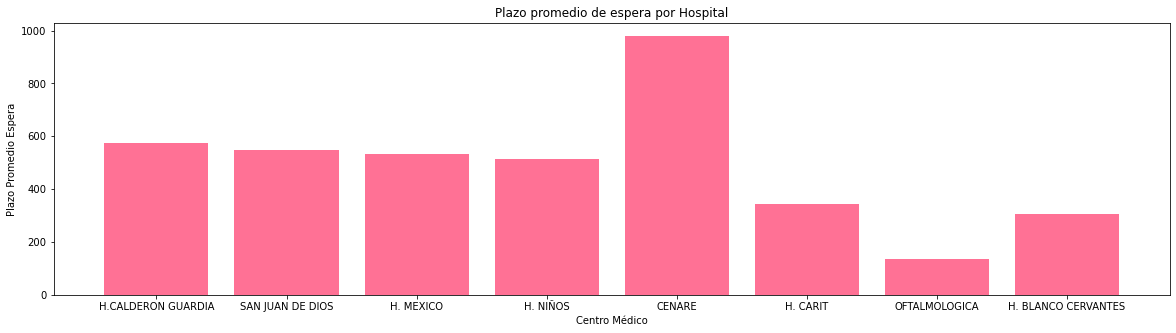

In [67]:
eje_x = dfPlazosGAM['Unidad'].tolist()
eje_y = dfPlazosGAM['PlazoPromedio'].tolist()

plt.figure(figsize=(20,5))
##Creamos la Grafica
bar_colors = ['#ff7195']
plt.bar(eje_x, eje_y, color = bar_colors)

##Leyenda en el eje y
plt.ylabel('Plazo Promedio Espera')

##Leyenda en el eje x
plt.xlabel("Centro Médico")

##Titulo del Grafico
plt.title("Plazo promedio de espera por Hospital")

plt.show()

<h4 style="color: #b14f7f">4.2.4 Diagnosticos que conforman la Lista de Espera del Cenare</h4>

<p>Se optiene el top 10 de los diagnosticos que conforman la lista de espera del CENARE, con el proposito de conocer la posibilidad de establer acciones concretas en ese centro asistencial para disminuir el plazo promedio de espera</p>

In [68]:
gf10 = in_2203.groupby(['dscDiagnostico']).count()
gf10 = gf10.iloc[:,:1]
tempGF10 = gf10.sort_values('idUtle',ascending=False)
top10DxCENARE = tempGF10.head(10)
top10DxCENARE

,idUtle
dscDiagnostico,
"Caries dental, no especificada",483
"Gonartrosis, no especificada",345
Sindrome del t·nel carpiano,113
"Coxartrosis, no especificada",108
Otros trastornos especificados de los discos intervertebrales,64
Dolor en articulacion,63
Lumbago no especificado,62
Depositos [acreciones] en los dientes,49
"Deformidad en varo, no clasificada en otra parte",47


<h4 style="color: #371506">4.2.5 Lista de Espera de la Region "CENTRAL NORTE"</h4>

<p>Se realiza la agrupación de datos considerando únicamente los establecimientos médicos de la region central norte, de manera que se pueda comprender donde está la mayor concentración de casos para los establecimientos</p>
</br>
<img src="DRIPSCN.png">

In [69]:
in_region2 = dfPendientes['region'] == 'CENTRAL NORTE'
in_region2 = dfPendientes[in_region2]
in_region2.shape

(35854, 24)

In [70]:
gf11 = in_region2.groupby(['dscDiagnostico']).count()
gf11 = gf11.iloc[:,:1]
tempGF11 = gf11.sort_values('idUtle',ascending=False)
top10DxCN = tempGF11.head(10)
top10DxCN

,idUtle
dscDiagnostico,
Calculo de la vesicula biliar sin colecistitis,2603
Catarata senil nuclear,2327
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",1964
Esterilización,1852
Venas varicosas de los miembros inferiores sin ·lcera ni inflamacion,1415
Hiperplasia de la prostata,1245
Hernia umbilical sin obstruccion ni gangrena,1200
"Catarata, no especificada",1153
Insuficiencia venosa (cronica) (periferica),1108


<h4 style="color: #371506">4.2.6 Concentración de la Lista de Espera según Hospital</h4>

<p>Se obtiene la distribución de la lista de espera por hospital, con el propósito de conocer en cual establecimiento se concentra la mayor cantidad de listas de espera quirurgica</p>

In [71]:
gf12 = in_region2.groupby(['centroMedico']).count()
gf12 = gf12.iloc[:,:1]
tempGF12 = gf12.sort_values('idUtle',ascending=False)
tempGF12

,idUtle
centroMedico,
H. SAN VICENTE PAUL,15831
H. SAN RAFAEL ALAJUELA,12099
H. SAN RAMON,5444
H. SAN FRANCISCO DE ASIS,2356
CL. CLORITO PICADO,124


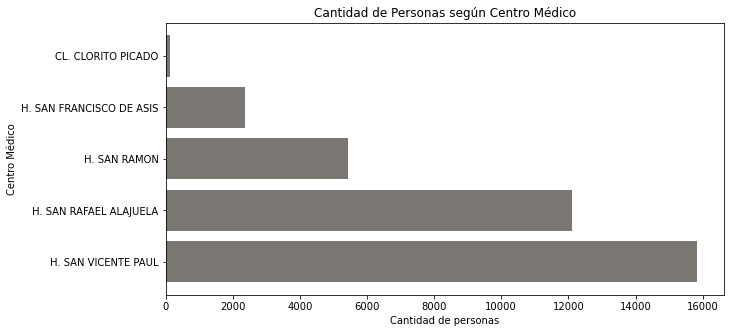

In [72]:
eje_x = tempGF12.index.tolist()
eje_y = tempGF12['idUtle'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#7a7672']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color: #371506">4.2.7 Plazo Promedio de Espera según Hospital</h4>

<p>Se generan los plazos promedio de espera, según hospital con el propósito de conocer por plazos promedios de espera donde podríamos orientar los recursos de la región para impactar en los plazos de espera globales</p>

In [73]:
dfPlazosCN = pd.DataFrame()
dfPlazosCN['Unidad'] = None
dfPlazosCN['PlazoPromedio'] = None
print(dfPlazosCN)

Empty DataFrame
Columns: [Unidad, PlazoPromedio]
Index: []


In [74]:
in_2208 = in_region2['up'] == 2208
in_2208 = in_region2[in_2208]
avg_plazo_2208 = in_2208["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera 2208: ", avg_plazo_2208)

Promedio del Plazo de Espera 2208:  627.7182111047944


In [75]:
in_2205 = in_region2['up'] == 2205
in_2205 = in_region2[in_2205]
avg_plazo_2205 = in_2205["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera 2205: ", avg_plazo_2205)

Promedio del Plazo de Espera 2205:  679.0066121167039


In [76]:
in_2207 = in_region2['up'] == 2207
in_2207 = in_region2[in_2207]
avg_plazo_2207 = in_2207["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera 2207: ", avg_plazo_2207)

Promedio del Plazo de Espera 2207:  402.3295371050698


In [77]:
in_2206 = in_region2['up'] == 2206
in_2206 = in_region2[in_2206]
avg_plazo_2206 = in_2206["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera 2206: ", avg_plazo_2206)

Promedio del Plazo de Espera 2206:  579.5891341256366


In [78]:
in_2213 = in_region2['up'] == 2213
in_2213 = in_region2[in_2213]
avg_plazo_2213 = in_2213["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera 2213: ", avg_plazo_2213)

Promedio del Plazo de Espera 2213:  82.05645161290323


In [79]:
up = ['H.SAN VICENTE DE PAUL', 'H. SAN RAFEL', 'H. SAN RAMON', 'H. SAN FCO ASIS', 'CL. CLORITO PICADO']
plazo = [avg_plazo_2208, avg_plazo_2205,avg_plazo_2207,avg_plazo_2206, avg_plazo_2213]

dfPlazosCN['Unidad'] = up
dfPlazosCN['PlazoPromedio'] = plazo

dfPlazosCN = dfPlazosCN.sort_values('PlazoPromedio',ascending=False)
dfPlazosCN



,Unidad,PlazoPromedio
1,H. SAN RAFEL,679.006612
0,H.SAN VICENTE DE PAUL,627.718211
3,H. SAN FCO ASIS,579.589134
2,H. SAN RAMON,402.329537
4,CL. CLORITO PICADO,82.056452


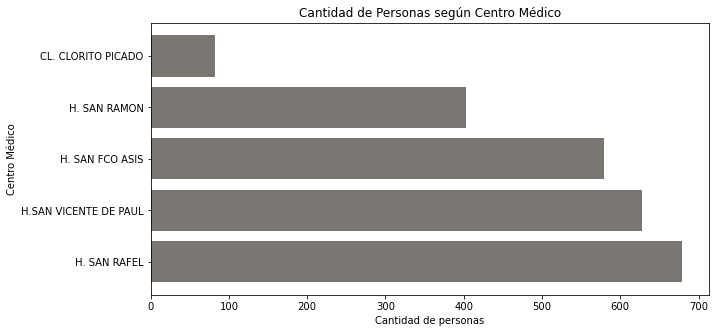

In [80]:
eje_x = dfPlazosCN['Unidad'].tolist()
eje_y = dfPlazosCN['PlazoPromedio'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#7a7672']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color: #371506">4.2.8 Diagnósticos que conforman la Lista de Espera del H. San Rafael</h4>

<p>Se optiene el top 10 de los diagnosticos que conforman la lista de espera del SAN RAFAEL, con el proposito de conocer la posibilidad de establer acciones concretas en ese centro asistencial para disminuir el plazo promedio de espera</p>

In [81]:
gf13 = in_2206.groupby(['dscDiagnostico']).count()
gf13 = gf13.iloc[:,:1]
tempGF10 = gf13.sort_values('idUtle',ascending=False)
top10DxSR = tempGF10.head(10)
top10DxSR

,idUtle
dscDiagnostico,
Hipertrofia de las amigdalas con hipertrofia de las adenoides,367
Calculo de la vesicula biliar sin colecistitis,249
Desviacion del tabique nasal,204
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",195
Hernia umbilical sin obstruccion ni gangrena,115
Hipertrofia de los cornetes nasales,110
Rinitis cronica,97
Amigdalitis cronica,71
Hipertrofia de las amigdalas,49


<h4 style="color:#122d75">4.2.9 Lista de Espera de la Region "CENTRAL SUR"</h4>

<p>Se realiza la agrupación de datos considerando únicamente los establecimientos médicos de la region central sur, de manera que se pueda comprender donde está la mayor concentración de casos para los establecimientos</p>
</br>
<img src="DRIPSCS.png">

In [82]:
in_region3 = dfPendientes['region'] == 'CENTRAL SUR'
in_region3 = dfPendientes[in_region3]
in_region3.shape

(19863, 24)

In [83]:
gfcs01 = in_region3.groupby(['dscDiagnostico']).count()
gfcs01 = gfcs01.iloc[:,:1]
tempGF12 = gfcs01.sort_values('idUtle',ascending=False)
top10DxCS = tempGF12.head(10)
top10DxCS

,idUtle
dscDiagnostico,
Pterigion,1502
Esterilización,1483
Catarata senil nuclear,1089
"Catarata, no especificada",1087
Calculo de la vesicula biliar sin colecistitis,813
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",603
Sindrome del t·nel carpiano,540
Desviacion del tabique nasal,510
Insuficiencia venosa (cronica) (periferica),378


<h4 style="color: #122d75">4.2.10 Concentración de la Lista de Espera según Hospital</h4>

<p>Se obtiene la distribución de la lista de espera por hospital, con el propósito de conocer en cual establecimiento se concentra la mayor cantidad de listas de espera quirurgica</p>

In [84]:
gfcs02 = in_region3.groupby(['centroMedico']).count() #centroMedico
gfcs02 = gfcs02.iloc[:,:2]
tempGFCS01 = gfcs02.sort_values('up',ascending=False)
tempGFCS01

,idUtle,up
centroMedico,,
H. MAX PERALTA,16220,16220
H. WILLIAN ALLEN,1382,1382
CL. MORENO CAÑAS,1061,1061
CL. MARCIAL FALLAS,552,552
CL. SOLON NUÑEZ,0,429
CL. CARLOS DURAN,135,135
CAIS PURISCAL,71,71
A.S CARTAGO,0,13


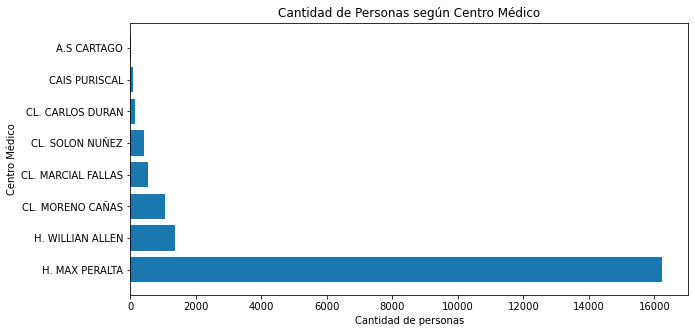

In [85]:
eje_x = tempGFCS01.index.tolist()
eje_y = tempGFCS01['up'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#1a78b0']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color:  #122d75">4.2.11 Plazo Promedio de Espera según Hospital</h4>

<p>Se genera la estimación del plazo promedio de espera por establecimiento de salud, con el propósito de identificar en cual establecimiento se concentra la mayor cantidad de personas, con el mayor tiempo de espera por una operación</p>

In [86]:
dfPlazosCS = pd.DataFrame()
dfPlazosCS['Unidad'] = None
dfPlazosCS['PlazoPromedio'] = None
print(dfPlazosCS)

Empty DataFrame
Columns: [Unidad, PlazoPromedio]
Index: []


In [87]:
gfcs03 = in_region3.groupby(['up']).count() #centroMedico
gfcs03 = gfcs03.iloc[:,:2]
tempGFcs01 = gfcs03.sort_values('idUtle',ascending=False)
tempGFcs01

,idUtle,centroMedico
up,,
2306,16220,16220
2307,1382,1382
2311,1061,1061
2315,552,552
2314,135,135
2331,71,71
2312,0,429
2342,0,13


In [88]:
in_2306 = in_region3['up'] == 2306
in_2306 = in_region3[in_2306]
avg_plazo_2306 = in_2306["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. Max Peralta: ", avg_plazo_2306)

Promedio del Plazo de Espera H. Max Peralta:  659.8506165228114


In [89]:
in_2307 = in_region3['up'] == 2307
in_2307 = in_region3[in_2307]
avg_plazo_2307 = in_2307["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. Willian Allen: ", avg_plazo_2307)

Promedio del Plazo de Espera H. Willian Allen:  222.15412445730826


In [90]:
in_2311 = in_region3['up'] == 2311
in_2311 = in_region3[in_2311]
avg_plazo_2311 = in_2311["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera CL Moreno Cañas: ", avg_plazo_2311)

Promedio del Plazo de Espera CL Moreno Cañas:  656.4627709707822


In [91]:
in_2315 = in_region3['up'] == 2315
in_2315 = in_region3[in_2315]
avg_plazo_2315 = in_2315["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera CL Marcial Fallas: ", avg_plazo_2315)

Promedio del Plazo de Espera CL Marcial Fallas:  400.6014492753623


In [92]:
in_2314 = in_region3['up'] == 2314
in_2314 = in_region3[in_2314]
avg_plazo_2314 = in_2314["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera CL Solon Nuñez: ", avg_plazo_2314)

Promedio del Plazo de Espera CL Solon Nuñez:  117.25925925925925


In [93]:
in_2331 = in_region3['up'] == 2331
in_2331 = in_region3[in_2331]
avg_plazo_2331 = in_2331["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera Cl Carlos Duran: ", avg_plazo_2331)

Promedio del Plazo de Espera Cl Carlos Duran:  228.91549295774647


In [94]:
in_2312 = in_region3['up'] == 2312
in_2312 = in_region3[in_2312]
avg_plazo_2312 = in_2312["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera AS Puriscal: ", avg_plazo_2312)

Promedio del Plazo de Espera AS Puriscal:  558.5034965034965


In [95]:
in_2342 = in_region3['up'] == 2342
in_2342 = in_region3[in_2342]
avg_plazo_2342 = in_2342["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera AS Cartago: ", avg_plazo_2342)

Promedio del Plazo de Espera AS Cartago:  1146.6153846153845


In [96]:
up = ['H. MAX PERALTA', 'H. WILLIAN ALLEN', 'CL. MORENO CAÑAS', 'CL. MARCIAL FALLAS', 'CL. SOLON NUÑEZ', 'CL. CARLOS DURAN', 'CAIS PURISCAL', 'A.S CARTAGO']
plazo = [avg_plazo_2306, avg_plazo_2307,avg_plazo_2311,avg_plazo_2315, avg_plazo_2314,avg_plazo_2331, avg_plazo_2312, avg_plazo_2342 ]

dfPlazosCS['Unidad'] = up
dfPlazosCS['PlazoPromedio'] = plazo

dfPlazosCS = dfPlazosCS.sort_values('PlazoPromedio',ascending=False)
dfPlazosCS

,Unidad,PlazoPromedio
7,A.S CARTAGO,1146.615385
0,H. MAX PERALTA,659.850617
2,CL. MORENO CAÑAS,656.462771
6,CAIS PURISCAL,558.503497
3,CL. MARCIAL FALLAS,400.601449
5,CL. CARLOS DURAN,228.915493
1,H. WILLIAN ALLEN,222.154124
4,CL. SOLON NUÑEZ,117.259259


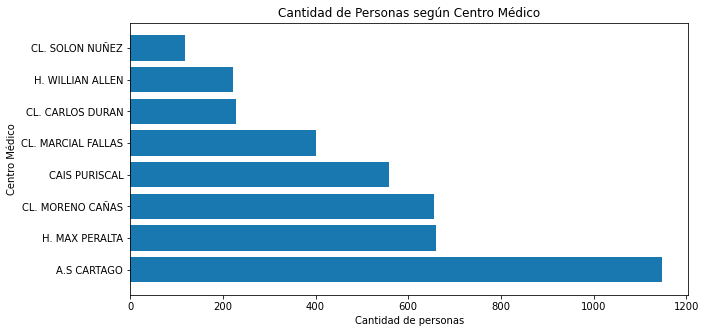

In [97]:
eje_x = dfPlazosCS['Unidad'].tolist()
eje_y = dfPlazosCS['PlazoPromedio'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#1a78b0']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color:#122d75">4.2.12 Lista de Espera del Área de Salud de Cartago</h4>

<p>Se optiene el top 10 de los diagnosticos que conforman la lista de espera del Área de Salud de Cartago, con el proposito de conocer la posibilidad de establer acciones concretas en ese centro asistencial para disminuir el plazo promedio de espera</p>

In [98]:
gfcs04 = in_2342.groupby(['dscDiagnostico']).count()
gfcs04= gfcs04.iloc[:,:2]
tempGFcs01=gfcs04.sort_values('idUtle',ascending=False)
top10DxASC = tempGFcs01.head(10)
top10DxASC

,idUtle,up
dscDiagnostico,,
Atencion materna por desproporcion debida a feto demasiado grande,0,1
Cistocele,0,2
Leiomioma intramural del ·tero,0,1
Otros quistes ovaricos y los no especificados,0,1
Polipo del cuerpo del ·tero,0,1
Prolapso de la c·pula vaginal despues de histerectomia,0,1
Prolapso uterovaginal completo,0,2
Quiste en desarrollo del ovario,0,1
Supervisión de embarazo normal no especificado,0,2


<h4 style="color: #ffa025">4.2.9 Lista de Espera de la Region "BRUNCA"</h4>

<p>Se realiza la agrupación de datos considerando únicamente los establecimientos médicos de la region Brunca, de manera que se pueda comprender donde está la mayor concentración de casos para los establecimientos</p>
</br>
<img src="DRIPSBRUNCA.png">

In [99]:
in_region4 = dfPendientes['region'] == 'BRUNCA'
in_region4 = dfPendientes[in_region4]
in_region4.shape

(16616, 24)

In [100]:
gfb01 = in_region4.groupby(['dscDiagnostico']).count()
gfb01 = gfb01.iloc[:,:1]
tempGF13 = gfb01.sort_values('idUtle',ascending=False)
top10DxB = tempGF13.head(10)
top10DxB

,idUtle
dscDiagnostico,
"Catarata, no especificada",2108
Pterigion,1677
Calculo de la vesicula biliar sin colecistitis,1200
Esterilización,879
Desviacion del tabique nasal,820
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",624
"Trastorno interno de la rodilla, no especificado",567
"Gonartrosis, no especificada",520
Hiperplasia de la prostata,433


<h4 style="color: #ffa025">4.2.14 Concentración de la Lista de Espera según Hospital</h4>

<p>Se obtiene la distribución de la lista de espera por hospital, con el propósito de conocer en cual establecimiento se concentra la mayor cantidad de listas de espera quirurgica</p>

In [101]:
gfb02 = in_region4.groupby(['centroMedico']).count() #centroMedico
gfb02 = gfb02.iloc[:,:2]
tempGFB01 = gfb02.sort_values('up',ascending=False)
tempGFB01

,idUtle,up
centroMedico,,
H. ESCALANTE PRADILLA,13230,13230
H. CIUDAD NEILY,2530,2530
H. GOLFITO,370,370
H. SAN VITO,368,368
H. TOMAS CASAS,118,118


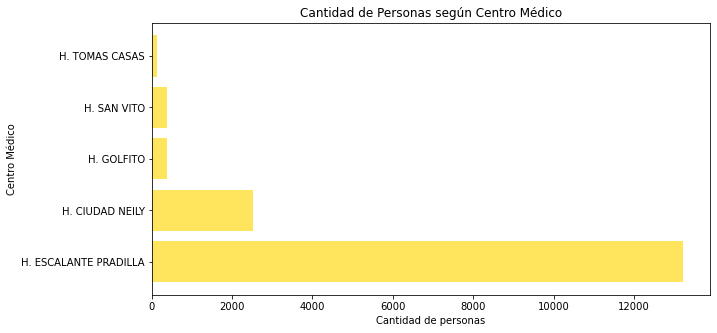

In [102]:
eje_x = tempGFB01.index.tolist()
eje_y = tempGFB01['up'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#ffe55e']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color:  #ff522e">4.2.15 Plazo Promedio de Espera según Hospital</h4>

<p>Se genera la estimación del plazo promedio de espera por establecimiento de salud, con el propósito de identificar en cual establecimiento se concentra la mayor cantidad de personas, con el mayor tiempo de espera por una operación</p>

In [103]:
gfb03 = in_region4.groupby(['up']).count() #centroMedico
gfb03 = gfb03.iloc[:,:1]
tempGFB02 = gfb03.sort_values('up',ascending=False)
tempGFB02

,idUtle
up,
2705,368
2704,2530
2703,118
2702,370
2701,13230


In [104]:
dfPlazosB = pd.DataFrame()
dfPlazosB['Unidad'] = None
dfPlazosB['PlazoPromedio'] = None
print(dfPlazosB)

Empty DataFrame
Columns: [Unidad, PlazoPromedio]
Index: []


In [105]:
in_2701 = in_region4['up'] == 2701
in_2701 = in_region4[in_2701]
avg_plazo_2701 = in_2701["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. Escalante Pradilla: ", avg_plazo_2701)

Promedio del Plazo de Espera H. Escalante Pradilla:  567.0733182161754


In [106]:
in_2704 = in_region4['up'] == 2704
in_2704 = in_region4[in_2704]
avg_plazo_2704 = in_2704["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. Ciudad Neily: ", avg_plazo_2704)

Promedio del Plazo de Espera H. Ciudad Neily:  185.6292490118577


In [107]:
in_2702 = in_region4['up'] == 2702
in_2702 = in_region4[in_2702]
avg_plazo_2702 = in_2702["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. Gofito: ", avg_plazo_2702)

Promedio del Plazo de Espera H. Gofito:  169.2945945945946


In [108]:
in_2705 = in_region4['up'] == 2705
in_2705 = in_region4[in_2705]
avg_plazo_2705 = in_2705["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. San Vito: ", avg_plazo_2705)

Promedio del Plazo de Espera H. San Vito:  80.3695652173913


In [109]:
in_2703 = in_region4['up'] == 2703
in_2703 = in_region4[in_2703]
avg_plazo_2703 = in_2703["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. Tomas Casas: ", avg_plazo_2703)

Promedio del Plazo de Espera H. Tomas Casas:  654.457627118644


In [127]:
up = ['H. ESCALANTE PRADILLA', 'H. CIUDAD NEILY', 'CL. GOLFITO', 'H. SAN VITO', 'H. TOMAS CASAS']
plazo = [avg_plazo_2701, avg_plazo_2704,avg_plazo_2702,avg_plazo_2705, avg_plazo_2703]

dfPlazosB['Unidad'] = up
dfPlazosB['PlazoPromedio'] = plazo

dfPlazosB = dfPlazosB.sort_values('PlazoPromedio',ascending=False)
dfPlazosB

,Unidad,PlazoPromedio
4,H. TOMAS CASAS,654.457627
0,H. ESCALANTE PRADILLA,567.073318
1,H. CIUDAD NEILY,185.629249
2,CL. GOLFITO,169.294595
3,H. SAN VITO,80.369565


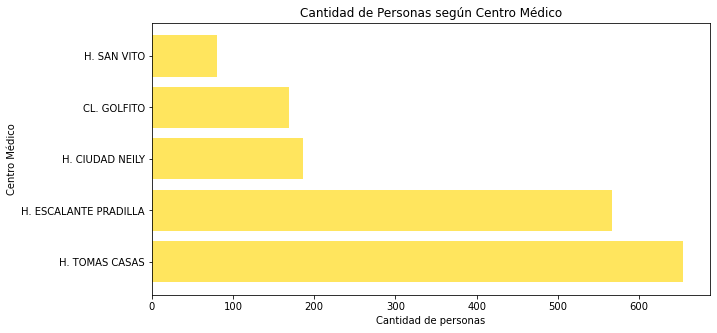

In [128]:
eje_x = dfPlazosB['Unidad'].tolist()
eje_y = dfPlazosB['PlazoPromedio'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#ffe55e']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color:  #ff522e">4.2.16 Lista de Espera del H. Tomás Casas</h4>

<p>Se genera la estimación del plazo promedio de espera por establecimiento de salud, con el propósito de identificar en cual establecimiento se concentra la mayor cantidad de personas, con el mayor tiempo de espera por una operación</p>

In [131]:
gfB03 = in_2703.groupby(['dscDiagnostico']).count()
gfB03= gfB03.iloc[:,:2]
tempGFB02=gfB03.sort_values('idUtle',ascending=False)
top10DxTC = tempGFB02.head(10)
top10DxTC

,idUtle,up
dscDiagnostico,,
Calculo de la vesicula biliar sin colecistitis,29,29
Otras atenciones especificadas para la anticoncepción,16,16
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",12,12
Hernia umbilical sin obstruccion ni gangrena,8,8
Quiste epidermico,3,3
"Nevo melanocitico, sitio no especificado",2,2
"Leiomioma del ·tero, sin otra especificacion",2,2
"Tumor benigno lipomatoso de piel y de tejido subcutaneo de cabeza, cara y cuello",2,2
"Incontinencia urinaria, no especificada",2,2


<h4 style="color: #1b9346">4.2.17 Lista de Espera de la Region "CHOROTEGA"</h4>

<p>Se realiza la agrupación de datos considerando únicamente los establecimientos médicos de la region Chorotega, de manera que se pueda comprender donde está la mayor concentración de casos para los establecimientos</p>
</br>
<img src="DRIPSCH.png">

In [134]:
in_region5 = dfPendientes['region'] == 'CHOROTEGA'
in_region5 = dfPendientes[in_region5]
in_region5.shape

(17460, 24)

In [135]:
gfCH01 = in_region4.groupby(['dscDiagnostico']).count()
gfCH01 = gfCH01.iloc[:,:1]
tempGF14 = gfCH01.sort_values('idUtle',ascending=False)
top10DxCH = tempGF14.head(10)
top10DxCH

,idUtle
dscDiagnostico,
"Catarata, no especificada",2108
Pterigion,1677
Calculo de la vesicula biliar sin colecistitis,1200
Esterilización,879
Desviacion del tabique nasal,820
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",624
"Trastorno interno de la rodilla, no especificado",567
"Gonartrosis, no especificada",520
Hiperplasia de la prostata,433


<h4 style="color: #1b9346">4.2.18 Concentración de la Lista de Espera según Hospital</h4>

<p>Se obtiene la distribución de la lista de espera por hospital, con el propósito de conocer en cual establecimiento se concentra la mayor cantidad de listas de espera quirurgica</p>

In [136]:
gfCH01 = in_region5.groupby(['centroMedico']).count() #centroMedico
gfCH01 = gfCH01.iloc[:,:2]
tempGFCH02 = gfCH01.sort_values('up',ascending=False)
tempGFCH02

,idUtle,up
centroMedico,,
H. ENRIQUE BALTODANO,8674,8674
H. LA ANEXION,6915,6915
CAIS CAÑAS,1699,1699
H. UPALA,172,172


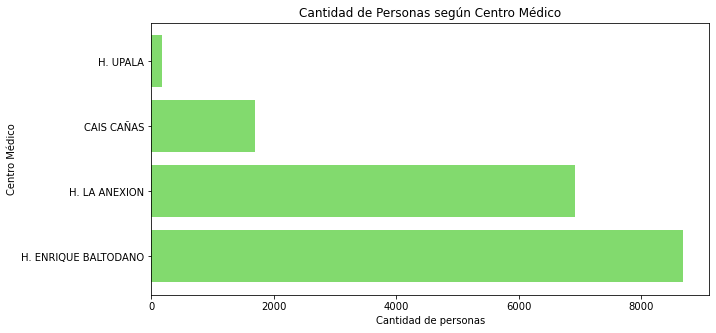

In [137]:
eje_x = tempGFCH02.index.tolist()
eje_y = tempGFCH02['up'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#82da6e']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color:  #0e665e">4.2.19 Plazo Promedio de Espera según Hospital</h4>

<p>Se genera la estimación del plazo promedio de espera por establecimiento de salud, con el propósito de identificar en cual establecimiento se concentra la mayor cantidad de personas, con el mayor tiempo de espera por una operación</p>

In [138]:
gfch03 = in_region5.groupby(['up']).count() #centroMedico
gfch03 = gfch03.iloc[:,:1]
tempGFch02 = gfch03.sort_values('idUtle',ascending=False)
tempGFch02

,idUtle
up,
2502,8674
2503,6915
2555,1699
2504,172


In [139]:
dfPlazosCH = pd.DataFrame()
dfPlazosCH['Unidad'] = None
dfPlazosCH['PlazoPromedio'] = None
print(dfPlazosCH)

Empty DataFrame
Columns: [Unidad, PlazoPromedio]
Index: []


In [140]:
in_2504 = in_region5['up'] == 2504
in_2504 = in_region5[in_2504]
avg_plazo_2504 = in_2504["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. Upala: ", avg_plazo_2504)

Promedio del Plazo de Espera H. Upala:  189.2674418604651


In [141]:
in_2555 = in_region5['up'] == 2555
in_2555 = in_region5[in_2555]
avg_plazo_2555 = in_2555["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera CAIS Cañas: ", avg_plazo_2555)

Promedio del Plazo de Espera CAIS Cañas:  230.49381989405532


In [142]:
in_2503 = in_region5['up'] == 2503
in_2503 = in_region5[in_2503]
avg_plazo_2503 = in_2503["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. La Anexión: ", avg_plazo_2503)

Promedio del Plazo de Espera H. La Anexión:  408.51323210412147


In [143]:
in_2502 = in_region5['up'] == 2502
in_2502 = in_region5[in_2502]
avg_plazo_2502 = in_2502["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. Liberia: ", avg_plazo_2502)

Promedio del Plazo de Espera H. Liberia:  483.78222273460915


In [167]:
up = ['H. UPALA', 'CAIS CAÑAS', 'H. LA ANEXION', 'H. ENRIQUE BALTODANO']
plazo = [avg_plazo_2504, avg_plazo_2555,avg_plazo_2503,avg_plazo_2502]

dfPlazosCH['Unidad'] = up
dfPlazosCH['PlazoPromedio'] = plazo

dfPlazosCH = dfPlazosCH.sort_values('PlazoPromedio',ascending=False)
dfPlazosCH

,Unidad,PlazoPromedio
3,H. ENRIQUE BALTODANO,483.782223
2,H. LA ANEXION,408.513232
1,CAIS CAÑAS,230.493820
0,H. UPALA,189.267442


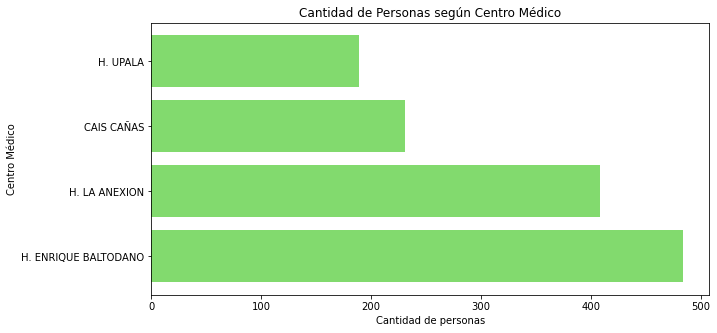

In [168]:
eje_x = dfPlazosCH['Unidad'].tolist()
eje_y = dfPlazosCH['PlazoPromedio'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#82da6e']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color:  #0e665e">4.2.20 Lista de Espera del H. Enrique Baltodano</h4>

<p>Se genera la estimación del plazo promedio de espera por establecimiento de salud, con el propósito de identificar en cual establecimiento se concentra la mayor cantidad de personas, con el mayor tiempo de espera por una operación</p>

In [146]:
gfch04 = in_2502.groupby(['dscDiagnostico']).count()
gfch04= gfch04.iloc[:,:2]
tempGFch02=gfch04.sort_values('idUtle',ascending=False)
top10DxHL = tempGFch02.head(10)
top10DxHL

,idUtle,up
dscDiagnostico,,
"Catarata, no especificada",709,709
Calculo de la vesicula biliar sin colecistitis,542,542
Catarata senil nuclear,512,512
Pterigion,463,463
Hiperplasia de la prostata,449,449
Venas varicosas de los miembros inferiores sin ·lcera ni inflamacion,403,403
Hernia umbilical sin obstruccion ni gangrena,325,325
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",319,319
"Prepucio redundante, fimosis y parafimosis",171,171


<h4 style="color: #00a0ff">4.2.21 Lista de Espera de la Region "HUETAR ATLANTICA"</h4>

<p>Se realiza la agrupación de datos considerando únicamente los establecimientos médicos de la region Huetar Atlantica, de manera que se pueda comprender donde está la mayor concentración de casos para los establecimientos</p>
</br>
<img src="DRIPSHA.png">

In [147]:
in_region6 = dfPendientes['region'] == 'HUETAR ALTLANTICA'
in_region6 = dfPendientes[in_region6]
in_region6.shape

(8305, 24)

In [150]:
gfha01 = in_region4.groupby(['dscDiagnostico']).count()
gfha01 = gfha01.iloc[:,:1]
tempGFha = gfha01.sort_values('idUtle',ascending=False)
top10Dxha = tempGFha.head(10)
top10Dxha

,idUtle
dscDiagnostico,
"Catarata, no especificada",2108
Pterigion,1677
Calculo de la vesicula biliar sin colecistitis,1200
Esterilización,879
Desviacion del tabique nasal,820
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",624
"Trastorno interno de la rodilla, no especificado",567
"Gonartrosis, no especificada",520
Hiperplasia de la prostata,433


<h4 style="color: #00a0ff">4.2.22 Concentración de la Lista de Espera según Hospital</h4>

<p>Se obtiene la distribución de la lista de espera por hospital, con el propósito de conocer en cual establecimiento se concentra la mayor cantidad de listas de espera quirurgica</p>

In [151]:
gfha02 = in_region6.groupby(['centroMedico']).count() #centroMedico
gfha02 = gfha02.iloc[:,:2]
tempGFha1 = gfha02.sort_values('up',ascending=False)
tempGFha1

,idUtle,up
centroMedico,,
H. TONY FACIO,4709,4709
H. GUAPILES,3149,3149
A.S SIQUIRRES,446,447


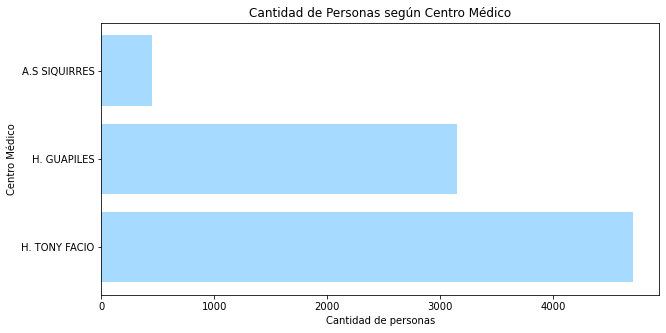

In [152]:
eje_x = tempGFha1.index.tolist()
eje_y = tempGFha1['up'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#a6dbff']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color:  #00a0ff">4.2.23 Plazo Promedio de Espera según Hospital</h4>

<p>Se genera la estimación del plazo promedio de espera por establecimiento de salud, con el propósito de identificar en cual establecimiento se concentra la mayor cantidad de personas, con el mayor tiempo de espera por una operación</p>

In [153]:
dfPlazosHA = pd.DataFrame()
dfPlazosHA['Unidad'] = None
dfPlazosHA['PlazoPromedio'] = None
print(dfPlazosHA)

Empty DataFrame
Columns: [Unidad, PlazoPromedio]
Index: []


In [156]:
gfha03 = in_region6.groupby(['up']).count() #centroMedico
gfha03 = gfha03.iloc[:,:1]
tempGFHA02 = gfha03.sort_values('idUtle',ascending=False)
tempGFHA02

,idUtle
up,
2601,4709
2602,3149
2631,446


In [158]:
in_2601 = in_region6['up'] == 2601
in_2601 = in_region6[in_2601]
avg_plazo_2601 = in_2601["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. Tony Facio: ", avg_plazo_2601)

Promedio del Plazo de Espera H. Tony Facio:  424.6604374601826


In [159]:
in_2602 = in_region6['up'] == 2602
in_2602 = in_region6[in_2602]
avg_plazo_2602 = in_2602["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. de Guapiles: ", avg_plazo_2602)

Promedio del Plazo de Espera H. de Guapiles:  392.02762781835503


In [161]:
in_2631 = in_region6['up'] == 2631
in_2631 = in_region6[in_2631]
avg_plazo_2631 = in_2631["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. de Guapiles: ", avg_plazo_2631)

Promedio del Plazo de Espera H. de Guapiles:  111.02460850111856


In [165]:
up = ['H. TONY FACIO', 'H. GUAPILES', 'CAIS SIQUIRRES']
plazo = [avg_plazo_2601, avg_plazo_2602, avg_plazo_2631]

dfPlazosHA['Unidad'] = up
dfPlazosHA['PlazoPromedio'] = plazo

dfPlazosHA  = dfPlazosHA.sort_values('PlazoPromedio',ascending=False)
dfPlazosHA

,Unidad,PlazoPromedio
0,H. TONY FACIO,424.660437
1,H. GUAPILES,392.027628
2,CAIS SIQUIRRES,111.024609


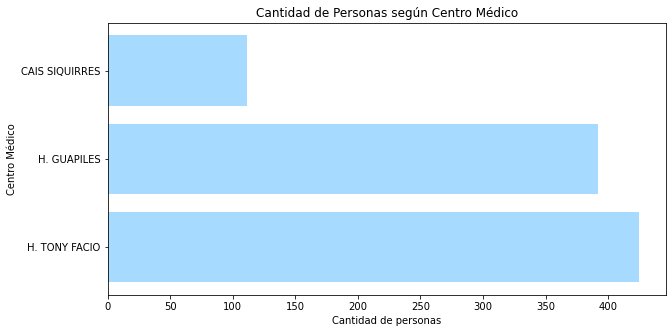

In [166]:
eje_x = dfPlazosHA['Unidad'].tolist()
eje_y = dfPlazosHA['PlazoPromedio'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#a6dbff']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color:  #00a0ff">4.2.20 Lista de Espera del H. Tony Facio</h4>

<p>Se genera la estimación del plazo promedio de espera por establecimiento de salud, con el propósito de identificar en cual establecimiento se concentra la mayor cantidad de personas, con el mayor tiempo de espera por una operación</p>

In [172]:
gfha04     = in_2601.groupby(['dscDiagnostico']).count()
gfha04     =  gfha04.iloc[:,:2]
tempGFha02 =  gfha04.sort_values('idUtle',ascending=False)
top10DxHTF = tempGFha02.head(10)
top10DxHTF

,idUtle,up
dscDiagnostico,,
"Catarata, no especificada",405,405
Calculo de la vesicula biliar sin colecistitis,380,380
Esterilización,371,371
Pterigion,368,368
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",271,271
Hiperplasia de la prostata,237,237
Hernia umbilical sin obstruccion ni gangrena,204,204
Catarata senil nuclear,199,199
"Leiomioma del ·tero, sin otra especificacion",141,141


<h4 style="color: #171934">4.2.25 Lista de Espera de la Region "HUETAR NORTE"</h4>

<p>Se realiza la agrupación de datos considerando únicamente los establecimientos médicos de la region Huetar Norte, de manera que se pueda comprender donde está la mayor concentración de casos para los establecimientos</p>
</br>
<img src="DRIPSHN.png">


In [173]:
in_region7 = dfPendientes['region'] == 'HUETAR NORTE'
in_region7 = dfPendientes[in_region7]
in_region7.shape

(6116, 24)

In [174]:
gfhn01 = in_region7.groupby(['dscDiagnostico']).count()
gfhn01 = gfhn01.iloc[:,:1]
temphn01 = gfhn01.sort_values('idUtle',ascending=False)
top10Dxhn = temphn01.head(10)
top10Dxhn

,idUtle
dscDiagnostico,
Catarata senil nuclear,636
Pterigion,535
Calculo de la vesicula biliar sin colecistitis,482
Esterilización,416
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",348
Catarata senil incipiente,242
Hernia umbilical sin obstruccion ni gangrena,196
"Catarata, no especificada",104
Desviacion del tabique nasal,98


<h4 style="color: #171934">4.2.26 Concentración de la Lista de Espera según Hospital</h4>

<p>Se obtiene la distribución de la lista de espera por hospital, con el propósito de conocer en cual establecimiento se concentra la mayor cantidad de listas de espera quirurgica</p>

In [175]:
gfhn02 = in_region7.groupby(['centroMedico']).count() #centroMedico
gfhn02 = gfhn02.iloc[:,:2]
tempGFhn02 = gfhn02.sort_values('up',ascending=False)
tempGFhn02

,idUtle,up
centroMedico,,
H. SAN CARLOS,5838,5838
H. LOS CHILES,278,278


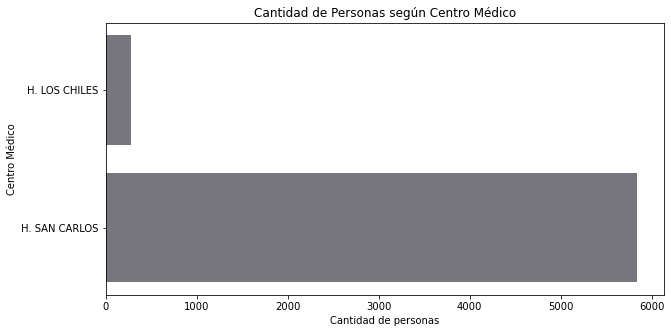

In [176]:
eje_x = tempGFhn02.index.tolist()
eje_y = tempGFhn02['up'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#77767c']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color:  #171934">4.2.27 Plazo Promedio de Espera según Hospital</h4>

<p>Se genera la estimación del plazo promedio de espera por establecimiento de salud, con el propósito de identificar en cual establecimiento se concentra la mayor cantidad de personas, con el mayor tiempo de espera por una operación</p>

In [178]:
gfhn03 = in_region7.groupby(['up']).count() #centroMedico
gfhn03 = gfhn03.iloc[:,:1]
tempGFhn03 = gfhn03.sort_values('idUtle',ascending=False)
tempGFhn03

,idUtle
up,
2401,5838
2402,278


In [179]:
dfPlazosHN = pd.DataFrame()
dfPlazosHN['Unidad'] = None
dfPlazosHN['PlazoPromedio'] = None
print(dfPlazosHN)

Empty DataFrame
Columns: [Unidad, PlazoPromedio]
Index: []


In [181]:
in_2401 = in_region7['up'] == 2401
in_2401 = in_region7[in_2401]
avg_plazo_2401 = in_2401["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. SAN CARLOS: ", avg_plazo_2401)

Promedio del Plazo de Espera H. SAN CARLOS:  248.00942103460088


In [183]:
in_2402 = in_region7['up'] == 2402
in_2402 = in_region7[in_2402]
avg_plazo_2402 = in_2402["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. LOS CHILES: ", avg_plazo_2402)

Promedio del Plazo de Espera H. LOS CHILES:  97.09712230215827


In [184]:
up = ['H. SAN CARLOS', 'H. LOS CHILES']
plazo = [avg_plazo_2401, avg_plazo_2402]

dfPlazosHN['Unidad'] = up
dfPlazosHN['PlazoPromedio'] = plazo

dfPlazosHN

,Unidad,PlazoPromedio
0,H. SAN CARLOS,248.009421
1,H. LOS CHILES,97.097122


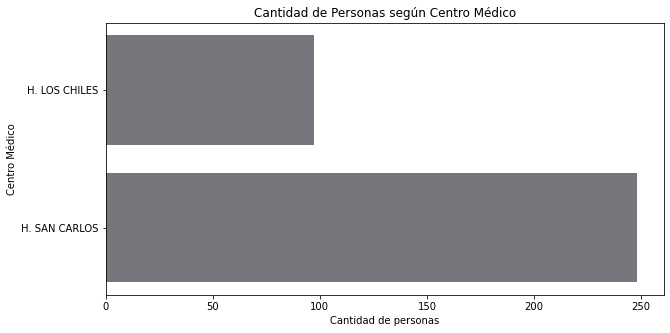

In [185]:
eje_x = dfPlazosHN['Unidad'].tolist()
eje_y = dfPlazosHN['PlazoPromedio'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#77767c']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color:  #171934">4.2.28 Lista de Espera del H. San Carlos</h4>

<p>Se genera la estimación del plazo promedio de espera por establecimiento de salud, con el propósito de identificar en cual establecimiento se concentra la mayor cantidad de personas, con el mayor tiempo de espera por una operación</p>

In [186]:
gfhn04 = in_2401.groupby(['dscDiagnostico']).count()
gfhn04= gfhn04.iloc[:,:2]
tempGFhn04=gfhn04.sort_values('idUtle',ascending=False)
top10DxHSC = tempGFhn04.head(10)
top10DxHSC

,idUtle,up
dscDiagnostico,,
Catarata senil nuclear,636,636
Pterigion,535,535
Calculo de la vesicula biliar sin colecistitis,436,436
Esterilización,323,323
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",322,322
Catarata senil incipiente,242,242
Hernia umbilical sin obstruccion ni gangrena,175,175
"Catarata, no especificada",104,104
Desviacion del tabique nasal,98,98


<h4 style="color:#c51148">4.2.29 Lista de Espera de la Region "PACIFICO CENTRAL"</h4>

<p>Se realiza la agrupación de datos considerando únicamente los establecimientos médicos de la region pacifico central, de manera que se pueda comprender donde está la mayor concentración de casos para los establecimientos</p>
</br>
<img src="DRIPSPC.png">

In [187]:
in_region8 = dfPendientes['region'] == 'PACIFICO CENTRAL'
in_region8 = dfPendientes[in_region8]
in_region8.shape

(8467, 24)

In [188]:
gfpc01 = in_region8.groupby(['dscDiagnostico']).count()
gfpc01 = gfpc01.iloc[:,:1]
temppc01 = gfpc01.sort_values('idUtle',ascending=False)
top10Dxpc = temppc01.head(10)
top10Dxpc

,idUtle
dscDiagnostico,
Calculo de la vesicula biliar sin colecistitis,860
Esterilización,857
Pterigion,666
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",556
Insuficiencia venosa (cronica) (periferica),397
Otros desplazamientos especificados de disco intervertebral,350
Hernia umbilical sin obstruccion ni gangrena,325
Otros desplazamientos de disco cervical,237
HERNIA INCISIONAL SIN OBSTRUCCIÓN O GANGRENA,159


<h4 style="color: #c51148">4.2.30 Concentración de la Lista de Espera según Hospital</h4>

<p>Se obtiene la distribución de la lista de espera por hospital, con el propósito de conocer en cual establecimiento se concentra la mayor cantidad de listas de espera quirurgica</p>

In [189]:
gfpc02 = in_region8.groupby(['centroMedico']).count() #centroMedico
gfpc02 = gfpc02.iloc[:,:2]
temppc02 = gfpc02.sort_values('up',ascending=False)
temppc02

,idUtle,up
centroMedico,,
H. MONSEÑOR SANABRIA,7282,7282
H. MAX TERAN VALLS,1185,1185


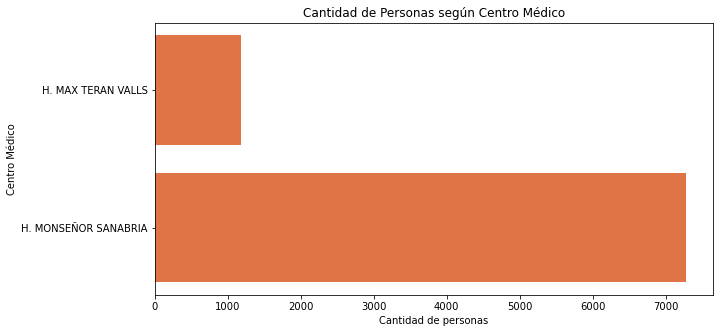

In [192]:
eje_x = temppc02.index.tolist()
eje_y = temppc02['up'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#df7446']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color:  #c51148">4.2.31 Plazo Promedio de Espera según Hospital</h4>

<p>Se genera la estimación del plazo promedio de espera por establecimiento de salud, con el propósito de identificar en cual establecimiento se concentra la mayor cantidad de personas, con el mayor tiempo de espera por una operación</p>

In [195]:
gfpc03 = in_region8.groupby(['up']).count() #centroMedico
gfpc03 = gfpc03.iloc[:,:1]
temppc03 = gfpc03.sort_values('idUtle',ascending=False)
temppc03

,idUtle
up,
2501,7282
2308,1185


In [194]:
dfPlazosPC = pd.DataFrame()
dfPlazosPC['Unidad'] = None
dfPlazosPC['PlazoPromedio'] = None
print(dfPlazosPC)

Empty DataFrame
Columns: [Unidad, PlazoPromedio]
Index: []


In [197]:
in_2501 = in_region8['up'] == 2501
in_2501 = in_region8[in_2501]
avg_plazo_2501 = in_2501["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. Monseñor Sanabria: ", avg_plazo_2501)

Promedio del Plazo de Espera H. Monseñor Sanabria:  682.7661356770118


In [198]:
in_2308 = in_region8['up'] == 2308
in_2308 = in_region8[in_2308]
avg_plazo_2308 = in_2308["plazoEspera"].astype("float").mean(axis=0)
print ("Promedio del Plazo de Espera H. Max Teran: ", avg_plazo_2308)

Promedio del Plazo de Espera H. Max Teran:  423.38227848101263


In [199]:
up = ['H. MONSEÑOR SANABRIA', 'H. MAX TERAN']
plazo = [avg_plazo_2501, avg_plazo_2308]

dfPlazosPC['Unidad'] = up
dfPlazosPC['PlazoPromedio'] = plazo

dfPlazosPC

,Unidad,PlazoPromedio
0,H. MONSEÑOR SANABRIA,682.766136
1,H. MAX TERAN,423.382278


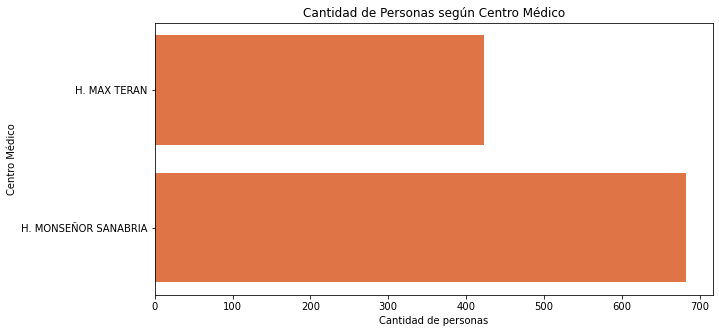

In [200]:
eje_x = dfPlazosPC['Unidad'].tolist()
eje_y = dfPlazosPC['PlazoPromedio'].tolist()

plt.figure(figsize=(10,5))
##Creamos la Grafica
bar_colors = ['#df7446']
plt.barh(eje_x, eje_y,color=bar_colors)
         

##Leyenda en el eje y
plt.ylabel('Centro Médico')

##Leyenda en el eje x
plt.xlabel("Cantidad de personas")

##Titulo del Grafico
plt.title("Cantidad de Personas según Centro Médico")

plt.show()

<h4 style="color:  #c51148">4.2.20 Lista de Espera del H. Monseñor Sanabria</h4>

<p>Se genera la estimación del plazo promedio de espera por establecimiento de salud, con el propósito de identificar en cual establecimiento se concentra la mayor cantidad de personas, con el mayor tiempo de espera por una operación</p>

In [201]:
gfpc04 = in_2501.groupby(['dscDiagnostico']).count()
gfpc04= gfpc04.iloc[:,:2]
temppc04=gfpc04.sort_values('idUtle',ascending=False)
top10DxHMS = temppc04.head(10)
top10DxHMS

,idUtle,up
dscDiagnostico,,
Calculo de la vesicula biliar sin colecistitis,708,708
Esterilización,673,673
Pterigion,666,666
"Hernia inguinal unilateral o no especificada, sin obstruccion ni gangrena",431,431
Insuficiencia venosa (cronica) (periferica),395,395
Otros desplazamientos especificados de disco intervertebral,349,349
Otros desplazamientos de disco cervical,237,237
Hernia umbilical sin obstruccion ni gangrena,224,224
Hiperplasia de la prostata,136,136
